In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import sys

sys.path.insert(1, '..')
from check_data_consistency import DataConsistencyChecker

In [2]:
# This notebook provides some examples of patterns and discovered in datasets
# on OpenML. For most datasets, at least one pattern of some interest can usually
# be found. In some cases, we include two or more here, but we mostly stick to
# one to keep the size of the notebook down, because not all patterns found
# are interesting, some are similar to other patterns, and the number of patterns
# found that are interesting is quite large. 

# We limit each test to one example as well. 

In [3]:
def demo_test(filename, test_id_arr, issue_id_arr=None, features_arr=None):
    
    # Load the data
    data = fetch_openml(filename, version=1)
    df = pd.DataFrame(data.data, columns=data.feature_names)
    display(df.head())
    
    # Run DataConsistencyChecker with default parameters, other than verbose=0
    # to skip printing the test IDs as the tests exectute. 
    dc = DataConsistencyChecker(verbose=0)  
    dc.init_data(df)
    _ = dc.check_data_quality(execute_list=test_id_arr)
    
    # If specific issues are specified, list only these.
    if issue_id_arr is not None:
        dc.display_detailed_results(issue_id_list=issue_id_arr)
    elif features_arr is not None:
        dc.display_detailed_results(col_name_list=features_arr)
    else:
        dc.display_detailed_results(test_id_list=test_id_arr)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055



Data consistency check complete.
Analysed 4,177 rows, 8 columns
Executed 3 tests.

Patterns without Exceptions:
Found 2 patterns without exceptions
1 tests (33.33% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 12 patterns with exceptions
3 tests (100.00% of tests) flagged at least one exception each.
Flagged 39 row(s) with at least one exception.
Flagged 7 column(s) with at least one exception.
....................................................................................................


### LARGER

### Column(s): "Length" AND "Diameter"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" is consistently larger than "Diameter", with exceptions.

**Number of exceptions**: 1 (0.0239% of rows)

**Examples of values NOT flagged**:

,Length,Diameter
192,0.580,0.450
638,0.440,0.345
1082,0.435,0.345
1360,0.605,0.435
2202,0.570,0.405
2636,0.440,0.340
2802,0.650,0.520
3619,0.640,0.500
3767,0.555,0.460
4125,0.540,0.415


**Flagged values**:

,Length,Diameter
1210,0.185,0.375


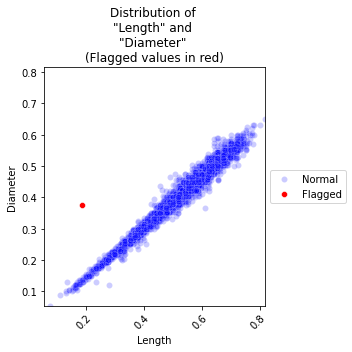

### Column(s): "Length" AND "Height"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" is consistently larger than "Height", with exceptions.

**Number of exceptions**: 1 (0.0239% of rows)

**Examples of values NOT flagged**:

,Length,Height
192,0.580,0.150
638,0.440,0.120
1082,0.435,0.115
1359,0.605,0.140
2202,0.570,0.160
2636,0.440,0.100
2802,0.650,0.155
3619,0.640,0.170
3767,0.555,0.160
4125,0.540,0.135


**Flagged values**:

,Length,Height
2051,0.455,1.13


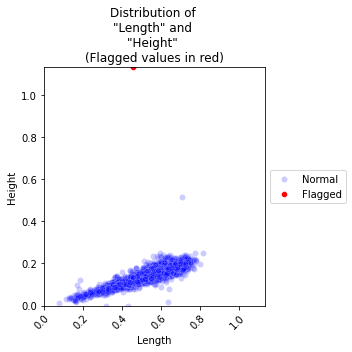

### Column(s): "Length" AND "Shell_weight"

**Issue ID**: 2

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" is consistently larger than "Shell_weight", with exceptions.

**Number of exceptions**: 15 (0.3591% of rows)

**Examples of values NOT flagged**:

,Length,Shell_weight
388,0.490,0.220
997,0.590,0.309
1374,0.615,0.300
1895,0.570,0.277
2176,0.570,0.405
2852,0.645,0.299
2889,0.520,0.160
3720,0.380,0.164
3769,0.560,0.245
3951,0.465,0.225


**Examples of flagged values**:

,Length,Shell_weight
81,0.620,0.675
129,0.710,0.780
163,0.725,1.005
164,0.650,0.815
166,0.725,0.850
168,0.705,0.760
277,0.610,0.690
891,0.730,0.897
2108,0.665,0.885
2157,0.620,0.725


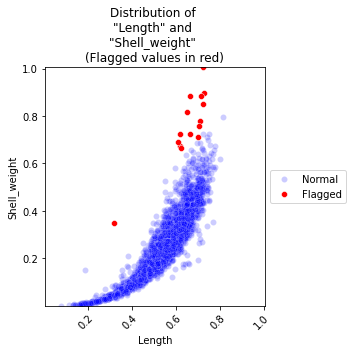

....................................................................................................


### SIMILAR_WRT_RATIO

### Column(s): "Length" AND "Diameter"

**Issue ID**: 8

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Length" and "Diameter" have consistently similar values in terms of their ratio, with exceptions.

**Number of exceptions**: 2 (0.0479% of rows)

**Examples of values NOT flagged**:

,Length,Diameter
192,0.580,0.450
638,0.440,0.345
1083,0.440,0.330
1361,0.605,0.475
1806,0.625,0.490
2056,0.475,0.380
2202,0.570,0.405
2659,0.550,0.440
2894,0.540,0.425
3548,0.495,0.370


**Flagged values**:

,Length,Diameter
898,0.280,0.120
1210,0.185,0.375


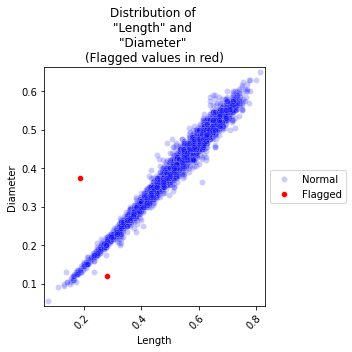

....................................................................................................


### LARGER_THAN_SUM

### Column(s): "Shucked_weight" AND "Viscera_weight" AND "Whole_weight"

**Issue ID**: 9

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "Whole_weight" are consistently larger than the sum of "Shucked_weight",  and<br>"Viscera_weight", with exceptions.

**Number of exceptions**: 9 (0.2155% of rows)

**Examples of values NOT flagged**:

,Shucked_weight,Viscera_weight,Whole_weight,SUM
192,0.2760,0.1815,0.9270,0.4575
214,0.2475,0.1280,0.6600,0.3755
302,0.1065,0.0595,0.2520,0.1660
347,0.0800,0.0555,0.2000,0.1355
378,0.3895,0.1830,0.9950,0.5725
1222,0.0960,0.0405,0.2015,0.1365
2792,0.5175,0.3105,1.2050,0.8280
2844,0.5900,0.2470,1.1255,0.8370
3418,0.4945,0.2700,1.2495,0.7645
3917,0.4335,0.2260,1.0660,0.6595


**Flagged values**:

,Shucked_weight,Viscera_weight,Whole_weight,SUM
822,0.0860,0.0585,0.1375,0.1445
1216,0.4350,0.0150,0.1055,0.4500
1264,0.3580,0.0775,0.3720,0.4355
2114,0.0050,0.0065,0.0105,0.0115
2127,0.1060,0.0710,0.1270,0.1770
2171,0.0155,0.0150,0.0295,0.0305
2627,0.4950,0.0190,0.1055,0.5140
2641,0.2025,0.0875,0.1315,0.2900
3086,0.3045,0.0460,0.2040,0.3505


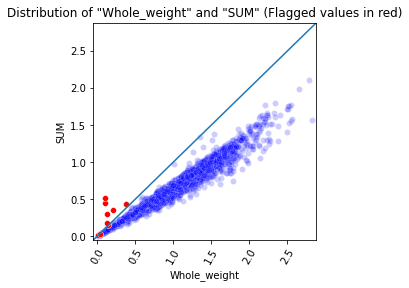

In [4]:
demo_test("abalone", test_id_arr=['LARGER', 'SIMILAR_WRT_RATIO', 'LARGER_THAN_SUM'], issue_id_arr=[9, 0, 1, 2, 8])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba



Data consistency check complete.
Analysed 48,842 rows, 14 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 32 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 1,067 row(s) with at least one exception.
Flagged 12 column(s) with at least one exception.



### Column(s): "marital-status" AND "relationship" AND "capitalgain"

**Issue ID**: 15

Unusual values were found.<br>

**Description**: "capitalgain" contains very large values given the values in "marital-status" and "relationship".

**Number of exceptions**: 14 (0.0287% of rows)

**Examples of values NOT flagged**:

,marital-status,relationship,capitalgain
3687,Never-married,Other-relative,0.0
5248,Married-civ-spouse,Husband,0.0
6518,Married-civ-spouse,Husband,0.0
6946,Married-civ-spouse,Husband,0.0
9777,Married-civ-spouse,Husband,0.0
10775,Divorced,Not-in-family,0.0
28461,Never-married,Own-child,0.0
34435,Married-civ-spouse,Husband,0.0
36134,Divorced,Not-in-family,4.0
44211,Married-civ-spouse,Husband,2.0


**Examples of flagged values**:

,marital-status,relationship,capitalgain
3108,Married-civ-spouse,Own-child,3.0
4160,Married-civ-spouse,Own-child,1.0
8146,Married-civ-spouse,Own-child,1.0
9211,Married-civ-spouse,Own-child,3.0
14762,Married-civ-spouse,Own-child,1.0
15820,Married-civ-spouse,Own-child,1.0
21223,Married-civ-spouse,Own-child,2.0
26362,Married-civ-spouse,Own-child,1.0
27464,Married-civ-spouse,Own-child,2.0
28541,Married-civ-spouse,Own-child,1.0


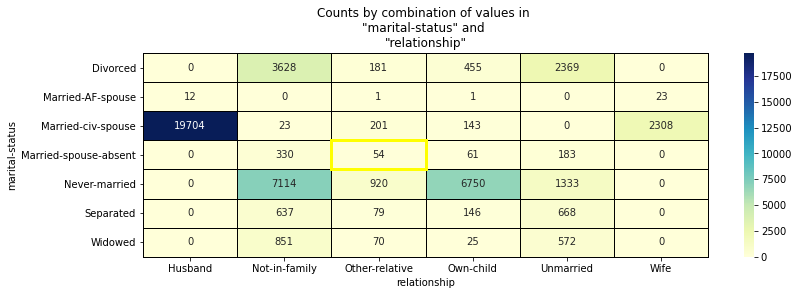

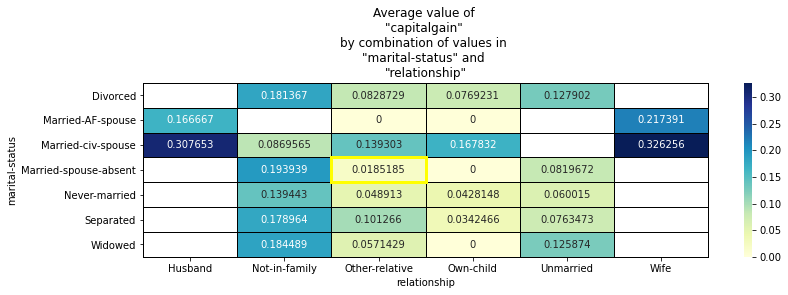

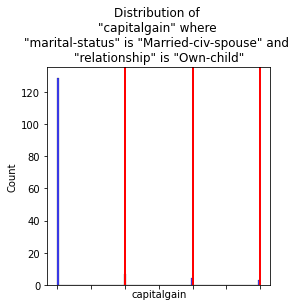

In [5]:
demo_test("adult", test_id_arr=['LARGE_GIVEN_PAIR'], issue_id_arr=[15])

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,jurofm,s,p,shape,thick,width,len,oil,bore,packing
0,NaN,C,A,8.0,0.0,NaN,S,NaN,0.0,NaN,...,NaN,NaN,NaN,COIL,0.700,610.0,0.0,NaN,0,NaN
1,NaN,C,R,0.0,0.0,NaN,S,2,0.0,NaN,...,NaN,NaN,NaN,COIL,3.200,610.0,0.0,NaN,0,NaN
2,NaN,C,R,0.0,0.0,NaN,S,2,0.0,NaN,...,NaN,NaN,NaN,SHEET,0.700,1300.0,762.0,NaN,0,NaN
3,NaN,C,A,0.0,60.0,T,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,COIL,2.801,385.1,0.0,NaN,0,NaN
4,NaN,C,A,0.0,60.0,T,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,SHEET,0.801,255.0,269.0,NaN,0,NaN



Data consistency check complete.
Analysed 898 rows, 31 columns
Executed 2 tests.

Patterns without Exceptions:
Found 2 patterns without exceptions
1 tests (50.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 3 patterns with exceptions
2 tests (100.00% of tests) flagged at least one exception each.
Flagged 5 row(s) with at least one exception.
Flagged 7 column(s) with at least one exception.
....................................................................................................


### NON_ZERO

### Column(s): width

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column consistently contains non-zero values, with exceptions.

**Number of exceptions**: 2 (0.2227% of rows)

**Examples of values NOT flagged**:

,width
31,1320.0
60,610.0
145,1250.0
505,609.0
506,1200.0
571,300.1
734,1525.0
807,1250.0
839,1220.0
848,610.0


**Flagged values**:

,width
606,0.0
845,0.0


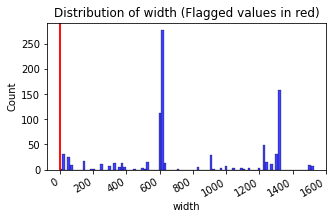

....................................................................................................


### DECISION_TREE_CLASSIFIER

### Column(s): "carbon" AND "hardness" AND "temper_rolling"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**:

The values in column "temper_rolling" are consistently predictable from ['carbon', 'hardness'] based using a decision tree with the following rules: <br>|--- hardness <= 47.50<br>|   |--- carbon <= 1.50<br>|   |   |--- class: nan<br>|   |--- carbon >  1.50<br>|   |   |--- carbon <= 7.00<br>|   |   |   |--- class: T<br>|   |   |--- carbon >  7.00<br>|   |   |   |--- class: nan<br>|--- hardness >  47.50<br>|   |--- class: T<br>, with exceptions.

**Number of exceptions**: 2 (0.2227% of rows)

**Examples of values NOT flagged**:

,carbon,hardness,temper_rolling,PREDICTION
0,8.0,0.0,nan,nan
1,0.0,0.0,nan,nan
2,0.0,0.0,nan,nan
3,0.0,60.0,T,T
4,0.0,60.0,T,T
5,0.0,45.0,nan,nan
6,0.0,0.0,nan,nan
17,0.0,80.0,T,T
19,0.0,70.0,T,T
22,0.0,85.0,T,T


**Flagged values**:

,carbon,hardness,temper_rolling,PREDICTION
110,0.0,0.0,T,nan
585,0.0,0.0,T,nan


In [6]:
demo_test("anneal", test_id_arr=['NON_ZERO', 'DECISION_TREE_CLASSIFIER'], issue_id_arr=[0, 1])

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,34.0,1,0,0,0,0,0,0,0,0,...,27.0,1,28.0,1,72.0,1,10.0,0,0,1
1,15.0,1,0,0,0,0,0,0,0,0,...,22.0,1,3.0,0,146.0,0,234.0,0,0,4
2,40.0,2,0,0,0,0,0,0,0,0,...,69.0,1,10.0,1,48.0,1,22.0,0,0,4
3,67.0,1,1,0,0,0,0,0,0,0,...,20.0,1,83.0,0,146.0,0,234.0,0,0,4
4,67.0,1,0,0,0,0,0,0,0,0,...,12.0,1,201.0,1,44.0,1,199.0,0,0,3



Data consistency check complete.
Analysed 3,772 rows, 27 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 2 row(s) with at least one exception.
Flagged 2 column(s) with at least one exception.



Displaying results for tests: 'SAME_VALUES'

### Column(s): "T4U_measured" AND "FTI_measured"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "FTI_measured" are consistently the same as those in "T4U_measured", with exceptions.

**Number of exceptions**: 2 (0.0530% of rows)

**Examples of values NOT flagged**:

,T4U_measured,FTI_measured
501,1,1
1623,1,1
2104,1,1
2163,1,1
2710,1,1
2831,1,1
3086,1,1
3442,1,1
3602,1,1
3692,1,1


**Flagged values**:

,T4U_measured,FTI_measured
765,0,1
1515,0,1


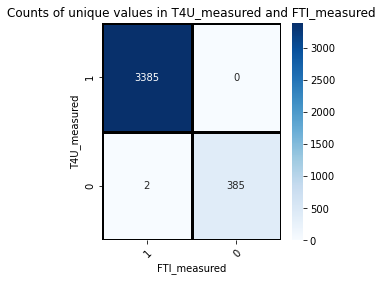

In [7]:
demo_test("allbp", test_id_arr=['SAME_VALUES'])

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,Strikeouts,Batting_average,On_base_pct,Slugging_pct,Fielding_ave,Position
0,23.0,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383.0,0.305,0.377,0.555,0.980,Outfield
1,13.0,1165.0,4019.0,378.0,1022.0,163.0,19.0,57.0,366.0,208.0,499.0,0.254,0.294,0.347,0.985,Second_base
2,13.0,1424.0,5557.0,844.0,1588.0,249.0,48.0,9.0,394.0,453.0,223.0,0.286,0.343,0.353,0.974,Second_base
3,14.0,1281.0,4019.0,591.0,1082.0,188.0,49.0,37.0,303.0,414.0,447.0,0.269,0.340,0.368,0.955,Third_base
4,17.0,1959.0,6606.0,823.0,1832.0,295.0,35.0,336.0,1122.0,594.0,1059.0,0.277,0.339,0.485,0.994,First_base



Data consistency check complete.
Analysed 1,340 rows, 16 columns
Executed 1 tests.

Patterns without Exceptions:
Found 1 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'LINEAR_REGRESSION'

### Column(s): "Games_played" AND "At_bats" AND "Runs" AND "Doubles" AND "RBIs" AND "Hits"

Pattern found (without exceptions)

**Description**:

The column "Hits" contains values that are consistently predictable based on a linear regression formula: <br>-37.818 +  0.03 * "Games_played" +  0.19 * "At_bats" +  0.39 * "Runs" +  0.90 * "Doubles" +  0.15 * "RBIs" 

**Examples**:

,Games_played,At_bats,Runs,Doubles,RBIs,Hits,PREDICTION
233,1896.0,7349.0,1012.0,415.0,1125.0,2192.0,2154.601562
364,848.0,2316.0,220.0,95.0,293.0,545.0,541.176385
458,1511.0,5914.0,1405.0,313.0,625.0,1753.0,1897.705045
465,1106.0,3125.0,373.0,126.0,396.0,727.0,768.118850
574,1161.0,3906.0,421.0,128.0,394.0,991.0,985.381163
661,1495.0,4829.0,490.0,266.0,595.0,1311.0,1310.943940
760,1423.0,3443.0,302.0,79.0,252.0,748.0,758.471814
958,1163.0,4610.0,874.0,170.0,391.0,1212.0,1322.259718
1023,1064.0,2708.0,367.0,135.0,410.0,670.0,716.207252
1323,1920.0,6653.0,1105.0,285.0,964.0,1665.0,1741.347643


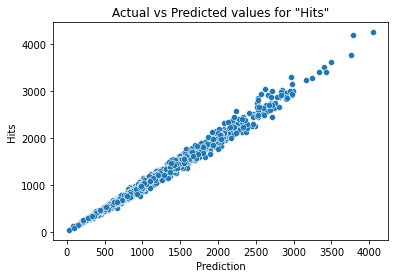

In [8]:
demo_test("baseball", test_id_arr=['LINEAR_REGRESSION'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown



Data consistency check complete.
Analysed 45,211 rows, 16 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 28 row(s) with at least one exception.
Flagged 1 column(s) with at least one exception.



Displaying results for tests: 'COLUMN_ORDERED_ASC'

### Column(s): V10

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column contains consistently ascending values, with exceptions.

**Number of exceptions**: 28 (0.0619% of rows)

**Examples of values NOT flagged (showing a consecutive set of rows)**:

,V10
39522,25.0
39523,25.0
39524,25.0
39525,25.0
39526,25.0
39527,25.0
39528,26.0
39529,26.0
39530,26.0
39531,26.0


**Examples of flagged values**:

,V10
7957,2.0
12443,1.0
18823,4.0
24038,17.0
24118,4.0
27716,4.0
28905,2.0
31201,2.0
31459,1.0
34177,4.0


Showing the first flagged example with the 5 rows before and 5 rows after (if available):

,V10
7952,30.0
7953,30.0
7954,30.0
7955,30.0
7956,30.0
7957,2.0
7958,2.0
7959,2.0
7960,2.0
7961,2.0


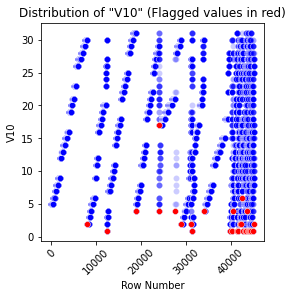

In [9]:
demo_test("bank-marketing", test_id_arr=['COLUMN_ORDERED_ASC'])

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Data consistency check complete.
Analysed 3,751 rows, 1776 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 5 row(s) with at least one exception.
Flagged 4 column(s) with at least one exception.



Displaying results for tests: 'DECISION_TREE_REGRESSOR'

### Column(s): "D1073" AND "D210" AND "D129" AND "D183"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**:

The values in column "D183" are consistently predictable from ['D1073', 'D210', 'D129'] based using a decision tree with the following rules: <br>|--- D210 <= 0.84<br>|   |--- D1073 is not 1.0<br>|   |   |--- D129 <= 0.13<br>|   |   |   |--- value: [0.95]<br>|   |   |--- D129 >  0.13<br>|   |   |   |--- value: [0.93]<br>|   |--- D1073 is 1.0<br>|   |   |--- value: [0.96]<br>|--- D210 >  0.84<br>|   |--- value: [0.98]<br>, with exceptions.

**Number of exceptions**: 5 (0.1333% of rows)

**Examples of values NOT flagged**:

,D1073,D210,D129,D183,PREDICTION
600,1.0,0.927678,0.315789,0.97674,0.976457
829,0.0,0.927678,0.000000,0.97674,0.976457
968,0.0,0.927678,0.000000,0.97674,0.976457
2528,1.0,0.927678,0.000000,0.97674,0.976457
2725,1.0,0.877370,0.052600,0.97049,0.976457
2850,1.0,0.927678,0.000000,0.97674,0.976457
2973,0.0,0.927678,0.000000,0.97674,0.976457
3042,0.0,0.927678,0.000000,0.97674,0.976457
3188,1.0,0.927678,0.000000,0.97674,0.976457
3435,1.0,0.927678,0.631579,0.97674,0.976457


**Flagged values**:

,D1073,D210,D129,D183,PREDICTION
432,1.0,0.729264,0.526316,0.763945,0.960087
763,0.0,0.186705,0.789474,0.382419,0.931250
807,1.0,0.360995,0.210526,0.841749,0.960087
1407,1.0,0.000000,1.000000,0.000000,0.960087
2262,1.0,0.233848,0.526316,0.652369,0.960087


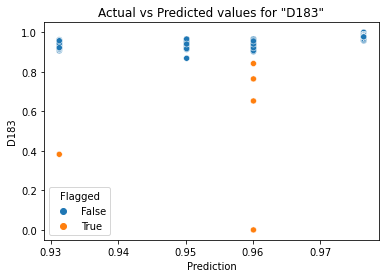

In [10]:
demo_test("bioresponse", test_id_arr=['DECISION_TREE_REGRESSOR'])

,V1,V2,V3,V4
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,1.0,16.0,4000.0,35.0
3,2.0,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0



Data consistency check complete.
Analysed 748 rows, 4 columns
Executed 3 tests.

Patterns without Exceptions:
Found 3 patterns without exceptions
3 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'CONSTANT_RATIO', 'EVEN_MULTIPLE', 'LINEAR_REGRESSION'

....................................................................................................


### CONSTANT_RATIO

### Column(s): "V2" AND "V3"

Pattern found (without exceptions)

**Description**:

The ratio of "V2" and "V3" is consistently close to 0.004

**Examples**:

,V2,V3,DIVISION RESULTS
14,6.0,1500.0,0.004
27,12.0,3000.0,0.004
31,10.0,2500.0,0.004
75,2.0,500.0,0.004
79,2.0,500.0,0.004
258,3.0,750.0,0.004
382,1.0,250.0,0.004
471,3.0,750.0,0.004
505,41.0,10250.0,0.004
521,11.0,2750.0,0.004


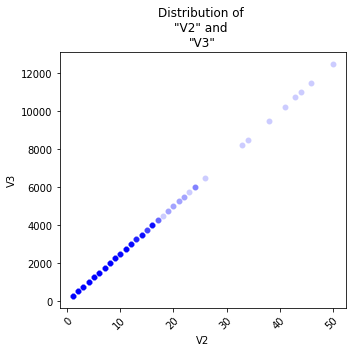

....................................................................................................


### EVEN_MULTIPLE

### Column(s): "V3" AND "V2"

Pattern found (without exceptions)

**Description**:

"V3" is consistently an even integer multiple of "V2"

**Examples**:

,V3,V2,DIVISION RESULTS
0,12500.0,50.0,250.0
1,3250.0,13.0,250.0
2,4000.0,16.0,250.0
3,5000.0,20.0,250.0
4,6000.0,24.0,250.0
5,1000.0,4.0,250.0
6,1750.0,7.0,250.0
7,3000.0,12.0,250.0
8,2250.0,9.0,250.0
9,11500.0,46.0,250.0


....................................................................................................


### LINEAR_REGRESSION

### Column(s): "V2" AND "V4" AND "V3"

Pattern found (without exceptions)

**Description**:

The column "V3" contains values that are consistently predictable based on a linear regression formula: <br>20.587 +  243.57 * "V2" +  0.50 * "V4" 

**Examples**:

,V2,V4,V3,PREDICTION
14,6.0,15.0,1500.0,1489.466362
27,12.0,34.0,3000.0,2960.330139
31,10.0,28.0,2500.0,2470.207580
75,2.0,4.0,500.0,509.717343
79,2.0,4.0,500.0,509.717343
258,3.0,28.0,750.0,765.196713
382,1.0,14.0,250.0,271.105358
471,3.0,40.0,750.0,771.149907
505,41.0,98.0,10250.0,10055.696955
521,11.0,41.0,2750.0,2720.229854


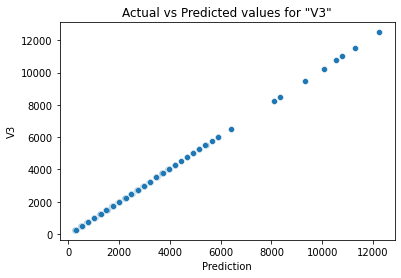

In [11]:
demo_test("blood-transfusion-service-center", test_id_arr=['CONSTANT_RATIO', 'EVEN_MULTIPLE', 'LINEAR_REGRESSION'])

In [12]:
demo_test("car-evaluation", test_id_arr=['GROUPED_STRINGS', 'PREV_VALUES_DT'])

,buying_price_vhigh,buying_price_high,buying_price_med,buying_price_low,maintenance_price_vhigh,maintenance_price_high,maintenance_price_med,maintenance_price_low,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,luggage_boot_size_small,luggage_boot_size_med,luggage_boot_size_big,safety_low,safety_med,safety_high
0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0



Data consistency check complete.
Analysed 1,728 rows, 21 columns
Executed 2 tests.

Patterns without Exceptions:
Found 8 patterns without exceptions
2 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'GROUPED_STRINGS', 'PREV_VALUES_DT'

....................................................................................................


### GROUPED_STRINGS

### Column(s): buying_price_vhigh

Pattern found (without exceptions)

**Description**:

The values in "buying_price_vhigh" are consistently grouped together. The overall order is: <br>Value: "1": rows 0 to 431<br>Value: "0": rows 432 to 1727

Examples are not shown for this pattern.

### Column(s): buying_price_low

Pattern found (without exceptions)

**Description**:

The values in "buying_price_low" are consistently grouped together. The overall order is: <br>Value: "0": rows 0 to 1295<br>Value: "1": rows 1296 to 1727

Examples are not shown for this pattern.

....................................................................................................


### PREV_VALUES_DT

### Column(s): luggage_boot_size_small

Pattern found (without exceptions)

**Description**:

The values in luggage_boot_size_small can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 9 rows previously was not '1'<br>|   |--- value: 0<br>|--- The value 9 rows previously was '1'<br>|   |--- value: 1<br>

**Examples (showing a consecutive set of rows)**:

,luggage_boot_size_small,PREDICTION
684,1,1
685,1,1
686,1,1
687,0,0
688,0,0
689,0,0
690,0,0
691,0,0
692,0,0
693,1,1


### Column(s): luggage_boot_size_med

Pattern found (without exceptions)

**Description**:

The values in luggage_boot_size_med can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 9 rows previously was not '1'<br>|   |--- value: 0<br>|--- The value 9 rows previously was '1'<br>|   |--- value: 1<br>

**Examples (showing a consecutive set of rows)**:

,luggage_boot_size_med,PREDICTION
559,0,0
560,0,0
561,1,1
562,1,1
563,1,1
564,0,0
565,0,0
566,0,0
567,0,0
568,0,0


### Column(s): luggage_boot_size_big

Pattern found (without exceptions)

**Description**:

The values in luggage_boot_size_big can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 9 rows previously was not '1'<br>|   |--- value: 0<br>|--- The value 9 rows previously was '1'<br>|   |--- value: 1<br>

**Examples (showing a consecutive set of rows)**:

,luggage_boot_size_big,PREDICTION
1653,1,1
1654,1,1
1655,1,1
1656,0,0
1657,0,0
1658,0,0
1659,0,0
1660,0,0
1661,0,0
1662,1,1


### Column(s): safety_low

Pattern found (without exceptions)

**Description**:

The values in safety_low can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 3 rows previously was not '0'<br>|   |--- value: 1<br>|--- The value 3 rows previously was '0'<br>|   |--- value: 0<br>

**Examples (showing a consecutive set of rows)**:

,safety_low,PREDICTION
1216,0,0
1217,0,0
1218,1,1
1219,0,0
1220,0,0
1221,1,1
1222,0,0
1223,0,0
1224,1,1
1225,0,0


### Column(s): safety_med

Pattern found (without exceptions)

**Description**:

The values in safety_med can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 3 rows previously was not '0'<br>|   |--- value: 1<br>|--- The value 3 rows previously was '0'<br>|   |--- value: 0<br>

**Examples (showing a consecutive set of rows)**:

,safety_med,PREDICTION
835,1,1
836,0,0
837,0,0
838,1,1
839,0,0
840,0,0
841,1,1
842,0,0
843,0,0
844,1,1


### Column(s): safety_high

Pattern found (without exceptions)

**Description**:

The values in safety_high can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 3 rows previously was not '0'<br>|   |--- value: 1<br>|--- The value 3 rows previously was '0'<br>|   |--- value: 0<br>

**Examples (showing a consecutive set of rows)**:

,safety_high,PREDICTION
763,0,0
764,1,1
765,0,0
766,0,0
767,1,1
768,0,0
769,0,0
770,1,1
771,0,0
772,0,0


In [13]:
demo_test("car", test_id_arr=['PREV_VALUES_DT'])

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med



Data consistency check complete.
Analysed 1,728 rows, 6 columns
Executed 1 tests.

Patterns without Exceptions:
Found 3 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'PREV_VALUES_DT'

### Column(s): persons

Pattern found (without exceptions)

**Description**:

The values in persons can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 9 rows previously was not '4'<br>|   |--- The value 9 rows previously was not 'more'<br>|   |   |--- value: 4<br>|   |--- The value 9 rows previously was 'more'<br>|   |   |--- value: 2<br>|--- The value 9 rows previously was '4'<br>|   |--- value: more<br>

**Examples (showing a consecutive set of rows)**:

,persons,PREDICTION
684,4,4
685,4,4
686,4,4
687,4,4
688,4,4
689,4,4
690,4,4
691,4,4
692,4,4
693,more,more


### Column(s): lug_boot

Pattern found (without exceptions)

**Description**:

The values in lug_boot can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 3 rows previously was not 'med'<br>|   |--- The value 3 rows previously was not 'big'<br>|   |   |--- value: med<br>|   |--- The value 3 rows previously was 'big'<br>|   |   |--- value: small<br>|--- The value 3 rows previously was 'med'<br>|   |--- value: big<br>

**Examples (showing a consecutive set of rows)**:

,lug_boot,PREDICTION
559,small,small
560,small,small
561,med,med
562,med,med
563,med,med
564,big,big
565,big,big
566,big,big
567,small,small
568,small,small


### Column(s): safety

Pattern found (without exceptions)

**Description**:

The values in safety can consistently be predicted from the previous values in the column with a decision tree using the following rules: <br><br>|--- The value 1 row previously was not 'low'<br>|   |--- The value 1 row previously was not 'med'<br>|   |   |--- value: low<br>|   |--- The value 1 row previously was 'med'<br>|   |   |--- value: high<br>|--- The value 1 row previously was 'low'<br>|   |--- value: med<br>

**Examples (showing a consecutive set of rows)**:

,safety,PREDICTION
1653,low,low
1654,med,med
1655,high,high
1656,low,low
1657,med,med
1658,high,high
1659,low,low
1660,med,med
1661,high,high
1662,low,low


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35
0,23.0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,45.0,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,45.0,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45.0,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,45.0,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Data consistency check complete.
Analysed 2,126 rows, 35 columns
Executed 3 tests.

Patterns without Exceptions:
Found 7 patterns without exceptions
2 tests (66.67% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'BINARY_IMPLIES', 'SAME_VALUES', 'SIMILAR_WRT_DIFF'

....................................................................................................


### BINARY_IMPLIES

### Column(s): "V26" AND "V27"

Pattern found (without exceptions)

**Description**:

"V26" value: "1.0" consistently implies "V27" value: 0.0

**Examples**:

,V26,V27
0,0.0,0.0
1,0.0,0.0
4,0.0,1.0
13,0.0,1.0
42,1.0,0.0
57,1.0,0.0


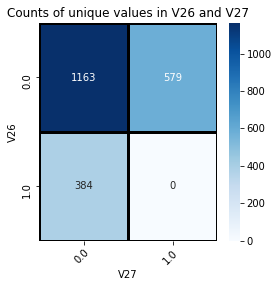

### Column(s): "V26" AND "V31"

Pattern found (without exceptions)

**Description**:

"V26" value: "1.0" consistently implies "V31" value: 0.0

**Examples**:

,V26,V31
0,0.0,0.0
1,0.0,1.0
2,0.0,1.0
4,0.0,0.0
42,1.0,0.0
57,1.0,0.0


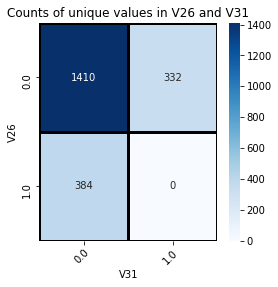

### Column(s): "V26" AND "V32"

Pattern found (without exceptions)

**Description**:

"V26" value: "1.0" consistently implies "V32" value: 0.0

**Examples**:

,V26,V32
0,0.0,0.0
1,0.0,0.0
17,0.0,1.0
28,0.0,1.0
42,1.0,0.0
57,1.0,0.0


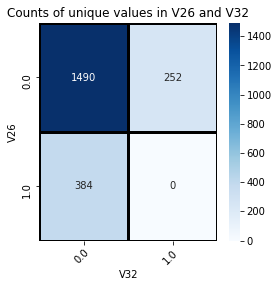

### Column(s): "V27" AND "V31"

Pattern found (without exceptions)

**Description**:

"V27" value: "1.0" consistently implies "V31" value: 0.0

**Examples**:

,V27,V31
0,0.0,0.0
1,0.0,1.0
2,0.0,1.0
4,1.0,0.0
5,0.0,0.0
13,1.0,0.0


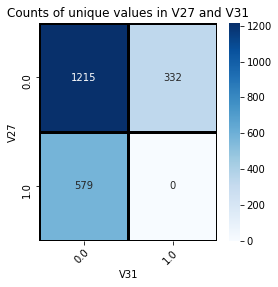

### Column(s): "V27" AND "V32"

Pattern found (without exceptions)

**Description**:

"V27" value: "1.0" consistently implies "V32" value: 0.0

**Examples**:

,V27,V32
0,0.0,0.0
1,0.0,0.0
4,1.0,0.0
13,1.0,0.0
17,0.0,1.0
28,0.0,1.0


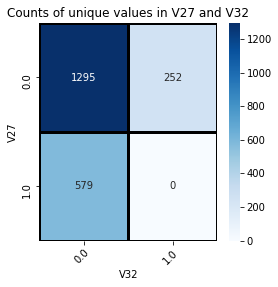

### Column(s): "V31" AND "V32"

Pattern found (without exceptions)

**Description**:

"V31" value: "1.0" consistently implies "V32" value: 0.0

**Examples**:

,V31,V32
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
4,0.0,0.0
17,0.0,1.0
28,0.0,1.0


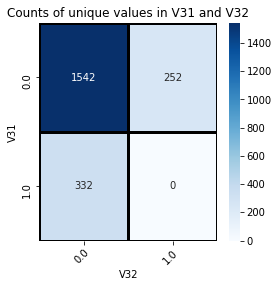

....................................................................................................


### SAME_VALUES

### Column(s): "V4" AND "V5"

Pattern found (without exceptions)

**Description**:

The values in "V5" are consistently the same as those in "V4"

**Examples**:

,V4,V5
251,130.0,130.0
386,129.0,129.0
658,130.0,130.0
825,152.0,152.0
905,146.0,146.0
1226,125.0,125.0
1440,146.0,146.0
1734,134.0,134.0
1808,143.0,143.0
1996,125.0,125.0


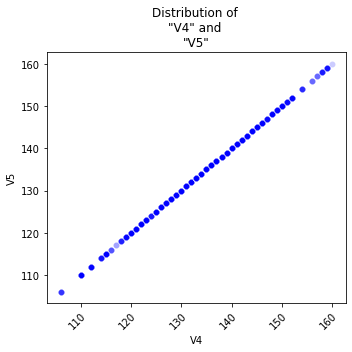

In [14]:
demo_test("cardiotocography", test_id_arr=['BINARY_IMPLIES', 'SAME_VALUES', 'SIMILAR_WRT_DIFF'])

In [15]:
demo_test("Click_prediction_small", test_id_arr=['ROUNDING'], issue_id_arr=[3])

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id
0,3.0,20711339.0,27500.0,2.0,2.0,2846.0,12631.0,26225.0,1887952.0
1,1.0,10398727.0,23808.0,2.0,2.0,14133.0,19101.0,18378.0,7665680.0
2,1.0,3827183.0,23792.0,1.0,1.0,5348.0,61.0,77.0,66280.0
3,2.0,4427867.0,28622.0,1.0,1.0,62466.0,127249.0,170983.0,0.0
4,2.0,1983809.0,11810.0,3.0,2.0,8139.0,37594.0,2339.0,290.0



Data consistency check complete.
Analysed 1,496,391 rows, 9 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 5 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 96 row(s) with at least one exception.
Flagged 5 column(s) with at least one exception.



### Column(s): description_id

**Issue ID**: 3

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column has values with consistently 0 to 2 trailing zeros, with less than 0 or with more than 4<br>trailing zeros.

**Number of exceptions**: 4 (0.0003% of rows)

**Examples of values NOT flagged**:

,description_id,Number Zeros
19701,11178.0,0
444088,1841.0,0
468307,471307.0,0
569742,4470.0,1
907628,5296.0,0
937167,3009.0,0
1107395,1107.0,0
1167775,156321.0,0
1353867,59652.0,0
1400923,206601.0,0


**Flagged values**:

,description_id,Number Zeros
208007,200000.0,5
1102007,100000.0,5
1244349,1700000.0,5
1299793,300000.0,5


,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912



Data consistency check complete.
Analysed 45,312 rows, 8 columns
Executed 1 tests.

Patterns without Exceptions:
Found 1 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 6 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 87 row(s) with at least one exception.
Flagged 6 column(s) with at least one exception.



### Column(s): transfer

**Issue ID**: 5

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column consistently contains non-zero values, with exceptions.

**Number of exceptions**: 1 (0.0022% of rows)

**Examples of values NOT flagged**:

,transfer
4084,0.414912
4191,0.414912
5225,0.414912
8330,0.414912
13533,0.414912
21372,0.536842
32738,0.767982
35347,0.235965
39720,0.479825
42141,0.516228


**Flagged values**:

,transfer
22058,0.0


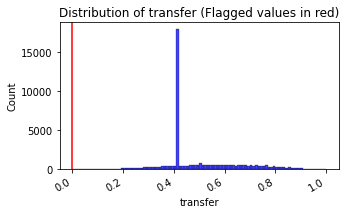

In [16]:
demo_test("electricity", test_id_arr=['NON_ZERO'], issue_id_arr=[5])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46



Data consistency check complete.
Analysed 14,980 rows, 14 columns
Executed 3 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 85 patterns with exceptions
3 tests (100.00% of tests) flagged at least one exception each.
Flagged 280 row(s) with at least one exception.
Flagged 14 column(s) with at least one exception.
....................................................................................................


### SIMILAR_PREVIOUS

### Column(s): V2

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "V2" are consistently similar to the previous value, more so than they are similar to<br>the median value of the column (4005.64), with exceptions.

**Number of exceptions**: 12 (0.0801% of rows)

**Examples of values NOT flagged (showing a consecutive set of rows)**:

,V2
3267,4013.85
3268,4015.90
3269,4012.82
3270,4010.77
3271,4010.77
3272,4006.67
3273,4003.59
3274,4007.18
3275,4015.38
3276,4019.49


**Examples of flagged values**:

,V2
898,3797.95
899,4005.13
2596,4033.85
4354,4001.54
10325,3992.82
10326,3959.49
10386,2830.77
10387,3959.49
11509,5500.51
11510,3991.28


Showing the first flagged example with the 5 rows before and 5 rows after (if available):

,V2
893,4011.28
894,4008.72
895,4004.10
896,4003.59
897,4007.69
898,3797.95
899,4005.13
900,4003.08
901,4009.74
902,4020.51


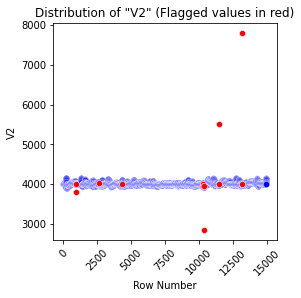

....................................................................................................


### SIMILAR_WRT_DIFF

### Column(s): "V2" AND "V10"

**Issue ID**: 28

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "V2" and "V10" have consistently similar values in terms of their absolute difference, with<br>exceptions.

**Number of exceptions**: 4 (0.0267% of rows)

**Examples of values NOT flagged**:

,V2,V10
1949,3989.74,4240.00
3658,3999.49,4227.69
4814,3989.23,4243.08
5095,4027.18,4241.54
7154,3970.26,4218.97
8435,3974.36,4211.28
9176,4030.26,4240.00
10357,3940.00,4231.79
12141,4033.33,4247.18
14517,4014.36,4187.69


**Flagged values**:

,V2,V10
898,3797.95,6215.38
10386,2830.77,1816.41
11509,5500.51,3914.87
13179,7804.62,6674.36


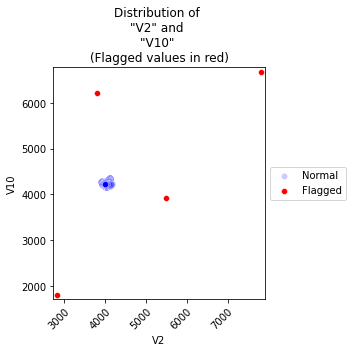

....................................................................................................


### CONSTANT_RATIO

### Column(s): "V5" AND "V8"

**Issue ID**: 81

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The ratio of "V5" and "V8" is consistently close to 0.9405689184819293, with exceptions.

**Number of exceptions**: 53 (0.3538% of rows)

**Examples of values NOT flagged**:

,V5,V8,DIVISION RESULTS
453,4340.51,4617.95,0.939921
2427,4327.18,4582.05,0.944376
2479,4327.18,4583.08,0.944164
3113,4338.46,4604.62,0.942197
5624,4350.77,4616.41,0.942457
6281,4323.59,4611.28,0.937612
7199,4332.82,4610.26,0.939821
11797,4412.31,4679.49,0.942904
13551,4342.56,4609.74,0.942040
13968,4342.05,4600.51,0.943819


**Examples of flagged values**:

,V5,V8,DIVISION RESULTS
196,4317.95,4637.95,0.931004
204,4310.26,4631.28,0.930684
213,4321.03,4653.85,0.928485
214,4318.46,4658.46,0.927015
215,4325.64,4654.36,0.929374
217,4322.56,4650.26,0.929531
218,4313.33,4646.67,0.928263
219,4316.41,4644.10,0.929440
220,4321.54,4650.26,0.929311
221,4319.49,4660.51,0.926828


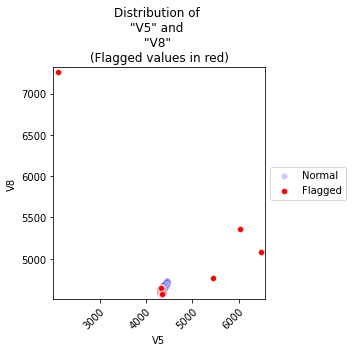

In [17]:
demo_test("eeg-eye-state", test_id_arr=['SIMILAR_PREVIOUS', 'SIMILAR_WRT_DIFF', 'CONSTANT_RATIO'], issue_id_arr=[81, 1, 28])

,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
0,Cra,1.0,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,co,1520.0,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5
1,Cra,1.0,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,fr,1487.0,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0
2,Cra,1.0,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,ma,1362.0,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0
3,Cra,1.0,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,nd,1596.0,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5
4,Cra,1.0,Central_Hawkes_Bay,N135_382/137,39__38,100.0,850.0,-2.0,1980.0,ni,2088.0,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0



Data consistency check complete.
Analysed 736 rows, 19 columns
Executed 3 tests.

Patterns without Exceptions:
Found 4 patterns without exceptions
3 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'GROUPED_STRINGS', 'CORRELATED_ALPHA_ORDER', 'POSITION_NON-ALPHANUMERIC'

....................................................................................................


### GROUPED_STRINGS

### Column(s): Abbrev

Pattern found (without exceptions)

**Description**:

The values in "Abbrev" are consistently grouped together. The overall order is: <br>Value: "Cra": rows 0 to 29<br>Value: "Cly": rows 30 to 53<br>Value: "Nga": rows 54 to 75<br>Value: "Wai": rows 76 to 145<br>Value: "K81": rows 146 to 210<br>Value: "Wak": rows 211 to 283<br>Value: "K82": rows 284 to 328<br>Value: "WSp": rows 329 to 387<br>Value: "K83": rows 388 to 436<br>Value: "Lon": rows 437 to 489<br>Value: "Puk": rows 490 to 573<br>Value: "Paw": rows 574 to 628<br>Value: "K81a": rows 629 to 661<br>Value: "Mor": rows 662 to 724<br>Value: "Wen": rows 725 to 730<br>Value: "WSh": rows 731 to 735

Examples are not shown for this pattern.

....................................................................................................


### CORRELATED_ALPHA_ORDER

### Column(s): "Map_Ref" AND "Latitude"

Pattern found (without exceptions)

**Description**:

"Map_Ref" is consistently similar, with regards to percentile, to "Latitude"

**Examples**:

,Map_Ref,Latitude
14,N135_382/137,39__38
27,N135_382/137,39__38
31,N116_848/985,39__00
187,N158_344/626,40__57
196,N158_344/626,40__57
385,N151_912/221,40__36
391,N158_344/626,40__57
569,N166_063/197,41__16
583,N146_273/737,40__00
706,N141_295/063,39__43


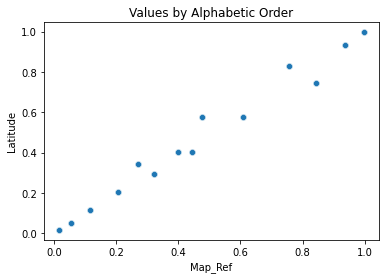

....................................................................................................


### POSITION_NON-ALPHANUMERIC

### Column(s): Map_Ref

Pattern found (without exceptions)

**Description**:

The column contains values consistently with '_' in position 8 from the end

**Examples**:

,Map_Ref
14,N135_382/137
27,N135_382/137
31,N116_848/985
187,N158_344/626
196,N158_344/626
385,N151_912/221
391,N158_344/626
569,N166_063/197
583,N146_273/737
706,N141_295/063


### Column(s): Latitude

Pattern found (without exceptions)

**Description**:

The column contains values consistently with '_' in position 2

**Examples**:

,Latitude
14,39__38
27,39__38
31,39__00
187,40__57
196,40__57
385,40__36
391,40__57
569,41__16
583,40__00
706,39__43


In [18]:
demo_test("eucalyptus", test_id_arr=['GROUPED_STRINGS', 'CORRELATED_ALPHA_ORDER', 'POSITION_NON-ALPHANUMERIC'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892



Data consistency check complete.
Analysed 10,299 rows, 561 columns
Executed 2 tests.

Patterns without Exceptions:
Found 14 patterns without exceptions
1 tests (50.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 11 patterns with exceptions
2 tests (100.00% of tests) flagged at least one exception each.
Flagged 182 row(s) with at least one exception.
Flagged 10 column(s) with at least one exception.
....................................................................................................


### VERY_SMALL_ABS

### Column(s): V103

**Issue ID**: 0

Unusual values were found.<br>

**Description**: Some values were unusually close to zero. Any values with absolute value less than<br>0.03842979999999996 were flagged, given the 10th percentile of absolute values is 0.4291894 and the<br>90th is 0.819949.  The coefficient is set at 1.0.

**Number of exceptions**: 36 (0.3495% of rows)

**Examples of values NOT flagged**:

,V103
2760,-0.807351
4271,-0.606766
4450,-0.230257
5640,0.601378
6223,0.674978
8139,-0.703994
9046,-0.615080
9356,0.554923
9749,-0.186180
10275,0.593294


**Examples of flagged values**:

,V103
67,0.037543
69,-0.030380
238,-0.035489
356,0.016084
357,0.006775
692,-0.036489
739,-0.009230
1049,0.007264
1223,-0.023924
1523,0.025068


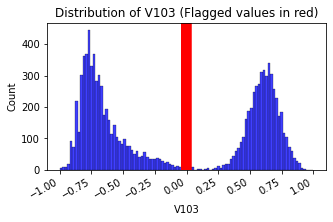

....................................................................................................


### ALL_POS_OR_ALL_NEG

### Column(s): "V41" AND "V50"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The columns in 'V41', 'V50' are consistently positive and negative together, with exceptions.

**Number of exceptions**: 24 (0.2330% of rows)

**Examples of values NOT flagged**:

,V41,V50
0,0.963396,0.892055
1,0.966561,0.892060
2,0.966878,0.892401
3,0.967615,0.893817
4,0.968224,0.893817
51,-0.255044,-0.271905
52,-0.210148,-0.271905
53,-0.208765,-0.272119
54,-0.209564,-0.277873
55,-0.208748,-0.277873


**Examples of flagged values**:

,V41,V50
1062,-0.260983,0.378942
1209,-0.208464,0.631872
1369,-0.245507,0.327235
1523,-0.386214,0.081736
1813,-0.211096,0.251817
2276,-0.051849,0.447983
2452,-0.111902,0.093824
2955,-0.045386,0.176393
3493,-0.102196,0.163296
4057,-0.012940,0.187957


In [19]:
demo_test("har", test_id_arr=['VERY_SMALL_ABS', 'ALL_POS_OR_ALL_NEG'], issue_id_arr=[0, 1])

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI



Data consistency check complete.
Analysed 3,772 rows, 27 columns
Executed 2 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 2 patterns with exceptions
2 tests (100.00% of tests) flagged at least one exception each.
Flagged 18 row(s) with at least one exception.
Flagged 5 column(s) with at least one exception.



Displaying results for tests: 'DECISION_TREE_CLASSIFIER', 'SAME_VALUES'

....................................................................................................


### DECISION_TREE_CLASSIFIER

### Column(s): "T3_measured" AND "T4U_measured" AND "TSH_measured" AND "TT4_measured"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**:

The values in column "TT4_measured" are consistently predictable from ['T3_measured', 'T4U_measured', 'TSH_measured'] based using a decision tree with the following rules: <br>|--- T4U_measured is not f<br>|   |--- class: t<br>|--- T4U_measured is f<br>|   |--- T3_measured is not f<br>|   |   |--- TSH_measured is not f<br>|   |   |   |--- class: t<br>|   |   |--- TSH_measured is f<br>|   |   |   |--- class: f<br>|   |--- T3_measured is f<br>|   |   |--- class: f<br>, with exceptions.

**Number of exceptions**: 17 (0.4507% of rows)

**Examples of values NOT flagged**:

,T3_measured,T4U_measured,TSH_measured,TT4_measured,PREDICTION
0,t,t,t,t,t
1,t,f,t,t,t
2,f,t,t,t,t
3,t,f,t,t,t
4,t,t,t,t,t
39,f,f,f,f,f
54,t,f,f,f,f
66,f,f,f,f,f
72,f,f,f,f,f
92,f,f,f,f,f


**Examples of flagged values**:

,T3_measured,T4U_measured,TSH_measured,TT4_measured,PREDICTION
324,t,t,t,f,t
400,t,f,t,f,t
538,t,f,f,t,f
595,f,f,f,t,f
765,t,f,t,f,t
1026,t,f,f,t,f
1091,f,f,t,t,f
1143,t,f,t,f,t
1239,t,f,t,f,t
1531,t,f,t,f,t


....................................................................................................


### SAME_VALUES

### Column(s): "T4U_measured" AND "FTI_measured"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "FTI_measured" are consistently the same as those in "T4U_measured", with exceptions.

**Number of exceptions**: 2 (0.0530% of rows)

**Examples of values NOT flagged**:

,T4U_measured,FTI_measured
501,t,t
1623,t,t
2104,t,t
2163,t,t
2710,t,t
2831,t,t
3086,t,t
3442,t,t
3602,t,t
3692,t,t


**Flagged values**:

,T4U_measured,FTI_measured
765,f,t
1515,f,t


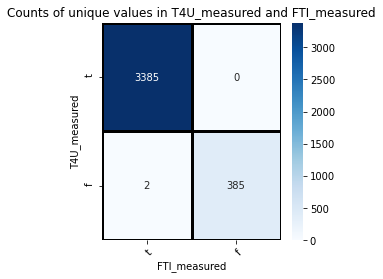

In [20]:
demo_test("hypothyroid", test_id_arr=['DECISION_TREE_CLASSIFIER', 'SAME_VALUES'])

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500



Data consistency check complete.
Analysed 7,797 rows, 617 columns
Executed 1 tests.

Patterns without Exceptions:
Found 3 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'BINARY_IMPLIES'

### Column(s): "f578" AND "f579"

Pattern found (without exceptions)

**Description**:

"f578" value: "1.0" consistently implies "f579" value: -1.0

**Examples**:

,f578,f579
0,-1.0,1.0
1,1.0,-1.0
2,-1.0,-1.0
3,-1.0,-1.0
4,-1.0,1.0
9,1.0,-1.0


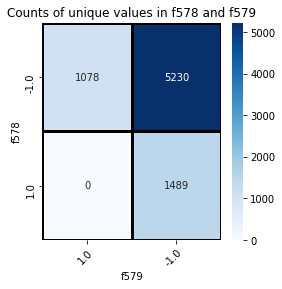

### Column(s): "f578" AND "f580"

Pattern found (without exceptions)

**Description**:

"f578" value: "1.0" consistently implies "f580" value: -1.0

**Examples**:

,f578,f580
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,-1.0,1.0
4,-1.0,-1.0
9,1.0,-1.0


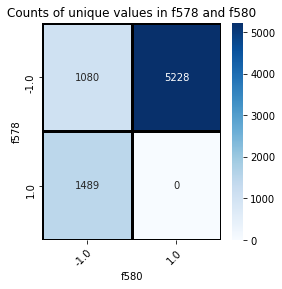

### Column(s): "f579" AND "f580"

Pattern found (without exceptions)

**Description**:

"f579" value: "1.0" consistently implies "f580" value: -1.0

**Examples**:

,f579,f580
0,1.0,-1.0
1,-1.0,-1.0
2,-1.0,1.0
3,-1.0,1.0
4,1.0,-1.0
9,-1.0,-1.0


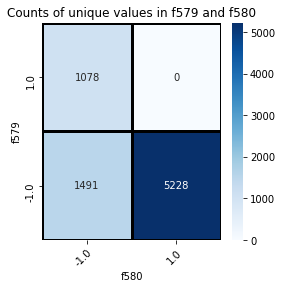

In [21]:
demo_test("Isolet", test_id_arr=['BINARY_IMPLIES'])

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500



Data consistency check complete.
Analysed 7,797 rows, 617 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 19 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 44 row(s) with at least one exception.
Flagged 22 column(s) with at least one exception.



### Column(s): "f579" AND "f503"

**Issue ID**: 5

Unusual values were found.<br>

**Description**: "f503" contains very small values given the specific value in "f579" (Values that are small given<br>any value of "f579" are not flagged by this test.).

**Number of exceptions**: 4 (0.0513% of rows)

**Examples of values NOT flagged**:

,f579,f503
201,-1.0,0.8182
1031,-1.0,0.5368
2606,-1.0,0.7074
2680,-1.0,0.6116
3850,1.0,0.6110
5031,1.0,-0.2000
5126,-1.0,0.5834
5895,-1.0,1.0000
6790,-1.0,0.6384
7113,-1.0,1.0000


**Flagged values**:

,f579,f503
22,1.0,-0.3632
218,1.0,-0.5582
5667,1.0,-0.3734
6290,1.0,-0.4482


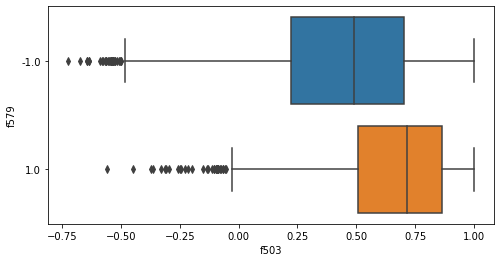

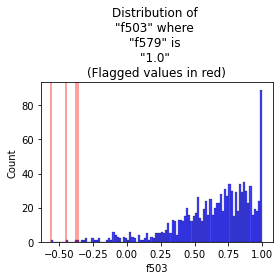

In [22]:
demo_test("Isolet", test_id_arr=['SMALL_GIVEN_VALUE'], issue_id_arr=[5])

,utterance,frame,coefficient1,coefficient2,coefficient3,coefficient4,coefficient5,coefficient6,coefficient7,coefficient8,coefficient9,coefficient10,coefficient11,coefficient12
0,1.0,1.0,1.860936,-0.207383,0.261557,-0.214562,-0.171253,-0.118167,-0.277557,0.025668,0.126701,-0.306756,-0.213076,0.088728
1,1.0,2.0,1.891651,-0.193249,0.235363,-0.249118,-0.112890,-0.112238,-0.311997,-0.027122,0.171457,-0.289431,-0.247722,0.093011
2,1.0,3.0,1.939205,-0.239664,0.258561,-0.291458,-0.041053,-0.102034,-0.383300,0.019013,0.169510,-0.314894,-0.227908,0.074638
3,1.0,4.0,1.717517,-0.218572,0.217119,-0.228186,-0.018608,-0.137624,-0.403318,-0.009643,0.164607,-0.323267,-0.210105,0.098098
4,1.0,5.0,1.741191,-0.279891,0.196583,-0.236377,-0.032012,-0.090612,-0.363134,-0.012571,0.124298,-0.351171,-0.216545,0.113899



Data consistency check complete.
Analysed 9,961 rows, 14 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 17 row(s) with at least one exception.
Flagged 1 column(s) with at least one exception.



Displaying results for tests: 'COLUMN_ORDERED_ASC'

### Column(s): utterance

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column contains consistently ascending values, with exceptions.

**Number of exceptions**: 17 (0.1707% of rows)

**Examples of values NOT flagged (showing a consecutive set of rows)**:

,utterance
2737,18.0
2738,18.0
2739,18.0
2740,18.0
2741,18.0
2742,18.0
2743,18.0
2744,18.0
2745,18.0
2746,18.0


**Examples of flagged values**:

,utterance
542,1.0
1007,1.0
1431,1.0
2037,1.0
2434,1.0
2957,1.0
3463,1.0
3840,1.0
4274,1.0
4828,1.0


Showing the first flagged example with the 5 rows before and 5 rows after (if available):

,utterance
537,30.0
538,30.0
539,30.0
540,30.0
541,30.0
542,1.0
543,1.0
544,1.0
545,1.0
546,1.0


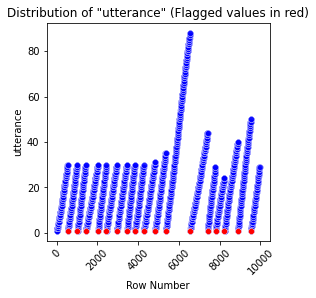

In [23]:
demo_test("JapaneseVowels", test_id_arr=['COLUMN_ORDERED_ASC'])

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1279.39,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,4122.37,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,572.07,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0



Data consistency check complete.
Analysed 10,885 rows, 21 columns
Executed 2 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 3 patterns with exceptions
2 tests (100.00% of tests) flagged at least one exception each.
Flagged 49 row(s) with at least one exception.
Flagged 7 column(s) with at least one exception.



Displaying results for tests: 'SIMILAR_TO_DIFF', 'SIMILAR_TO_PRODUCT'

....................................................................................................


### SIMILAR_TO_DIFF

### Column(s): "n" AND "total_Opnd" AND "total_Op"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: total_Op is consistently similar to the difference of n and total_Opnd, with exceptions.

**Number of exceptions**: 35 (0.3215% of rows)

**Examples of values NOT flagged**:

,n,total_Opnd,total_Op,ABSOLUTE DIFFERENCE
825,59.0,23.0,36.0,36.0
984,80.0,38.0,42.0,42.0
2140,2.0,0.0,2.0,2.0
2147,43.0,13.0,30.0,30.0
3253,82.0,34.0,48.0,48.0
3832,154.0,59.0,95.0,95.0
5284,21.0,8.0,13.0,13.0
6063,0.0,0.0,0.0,0.0
8144,0.0,0.0,0.0,0.0
8457,147.0,52.0,95.0,95.0


**Examples of flagged values**:

,n,total_Opnd,total_Op,ABSOLUTE DIFFERENCE
0,1.3,1.2,1.2,0.1
1,1.0,1.0,1.0,0.0
67,135.0,74.0,116.0,61.0
209,498.0,147.0,210.0,351.0
411,98.0,49.0,61.0,49.0
890,38.0,18.0,23.0,20.0
1241,137.0,54.0,73.0,83.0
1242,138.0,54.0,74.0,84.0
1438,232.0,58.0,138.0,174.0
1550,786.0,320.0,522.0,466.0


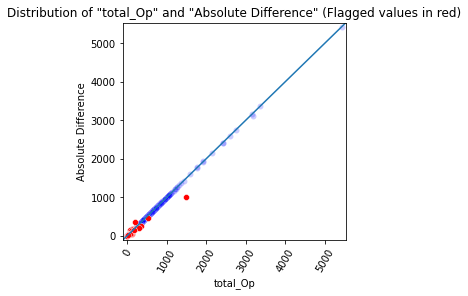

....................................................................................................


### SIMILAR_TO_PRODUCT

### Column(s): "v" AND "d" AND "e"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "e" is consistently similar to the product of "v" and "d", with exceptions.

**Number of exceptions**: 1 (0.0092% of rows)

**Examples of values NOT flagged**:

,v,d,e,PRODUCT
1467,168.56,9.00,1517.00,1517.0400
1727,1008.00,18.51,18660.29,18658.0800
3201,1207.88,30.38,36689.33,36695.3944
5353,121.11,9.00,1090.02,1089.9900
6371,0.00,0.00,0.00,0.0000
6638,11.61,1.50,17.41,17.4150
7974,357.58,6.81,2433.51,2435.1198
8194,780.70,16.81,13123.81,13123.5670
10514,263.11,11.00,2894.17,2894.2100
10709,198.81,6.19,1231.08,1230.6339


**Flagged values**:

,v,d,e,PRODUCT
0,1.3,1.3,1.3,1.69


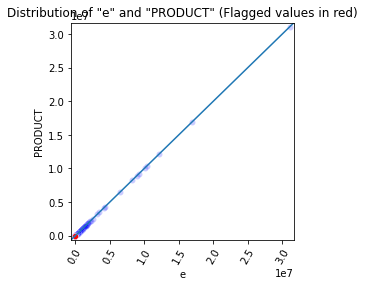

### Column(s): "d" AND "i" AND "v"

**Issue ID**: 2

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "v" is consistently similar to the product of "d" and "i", with exceptions.

**Number of exceptions**: 15 (0.1378% of rows)

**Examples of values NOT flagged**:

,d,i,v,PRODUCT
1403,15.58,27.87,434.26,434.2146
2449,0.00,0.00,0.00,0.0000
6706,5.70,34.59,197.15,197.1630
6853,9.00,43.62,392.55,392.5800
8083,0.00,0.00,0.00,0.0000
8856,3.75,10.63,39.86,39.8625
9139,24.37,30.31,738.75,738.6547
9451,34.64,72.42,2508.94,2508.6288
9748,21.00,30.60,642.55,642.6000
9819,5.65,35.93,203.13,203.0045


**Examples of flagged values**:

,d,i,v,PRODUCT
0,1.3,1.3,1.30,1.69
2117,0.0,0.0,2.00,0.00
2140,0.0,0.0,2.00,0.00
2775,0.0,0.0,4.75,0.00
3616,0.0,0.0,30.19,0.00
4006,0.0,0.0,4.75,0.00
4297,0.0,0.0,4.75,0.00
4463,0.0,0.0,4.75,0.00
6001,0.0,0.0,4.75,0.00
6002,0.0,0.0,4.75,0.00


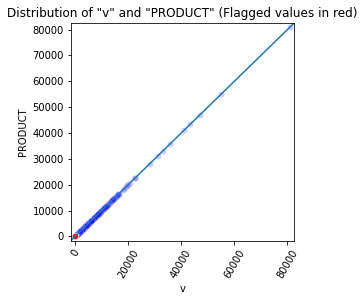

In [24]:
demo_test("jm1", test_id_arr=['SIMILAR_TO_DIFF', 'SIMILAR_TO_PRODUCT']) 

In [25]:
demo_test("jm1", test_id_arr=['RARE_DECIMALS', 'CORRELATED_FEATURES'], issue_id_arr=[1, 10, 11])

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1279.39,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,4122.37,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,572.07,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0


Error CORRELATED_FEATURES is not a valid test

Data consistency check complete.
Analysed 10,885 rows, 21 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 10 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 1 row(s) with at least one exception.
Flagged 10 column(s) with at least one exception.
....................................................................................................


### RARE_DECIMALS

### Column(s): v(g)

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column consistently contains values with one of '' after the decimal point.

**Number of exceptions**: 1 (0.0092% of rows)

**Examples of values NOT flagged**:

,v(g)
1467,2.0
1727,8.0
3201,8.0
5353,2.0
6371,12.0
6638,1.0
7974,2.0
8194,7.0
10514,3.0
10709,2.0


**Flagged values**:

,v(g)
0,1.4


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,48380.48,359.0,35.0,9.0,10.0,47.0,106.0,692.0,467.0,106.0
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,8258.00,174.0,15.0,34.0,5.0,23.0,67.0,343.0,232.0,65.0
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,5116.84,142.0,7.0,19.0,4.0,18.0,58.0,310.0,190.0,51.0



Data consistency check complete.
Analysed 522 rows, 21 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 1 row(s) with at least one exception.
Flagged 2 column(s) with at least one exception.



Displaying results for tests: 'LINEAR_REGRESSION'

### Column(s): "e" AND "t"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column "t" contains values that are consistently predictable based on a linear regression<br>formula:  0.008 +  0.06 * "e" , with exceptions.

**Number of exceptions**: 1 (0.1916% of rows)

**Examples of values NOT flagged**:

,e,t,PREDICTION
15,17.41,0.97,0.975085
45,12.00,0.67,0.674531
46,12.00,0.67,0.674531
108,12.00,0.67,0.674531
137,12.00,0.67,0.674531
157,18.67,1.04,1.045084
233,12.00,0.67,0.674531
236,12.00,0.67,0.674531
263,17.41,0.97,0.975085
320,12.00,0.67,0.674531


**Flagged values**:

,e,t,PREDICTION
425,2147483.64,153047.01,119304.015566


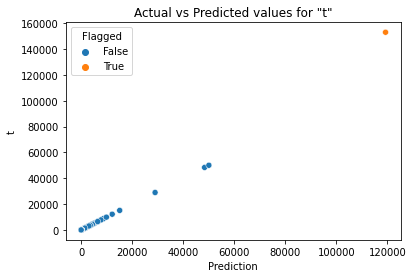

In [26]:
demo_test("kc2", test_id_arr=['LINEAR_REGRESSION'])

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,MUSK-211,46.0,-108.0,-60.0,-69.0,-117.0,49.0,38.0,-161.0,-8.0,...,-244.0,-308.0,52.0,-7.0,39.0,126.0,156.0,-50.0,-112.0,96.0
1,MUSK-211,41.0,-188.0,-145.0,22.0,-117.0,-6.0,57.0,-171.0,-39.0,...,-235.0,-59.0,-2.0,52.0,103.0,136.0,169.0,-61.0,-136.0,79.0
2,MUSK-211,46.0,-194.0,-145.0,28.0,-117.0,73.0,57.0,-168.0,-39.0,...,-238.0,-134.0,-154.0,57.0,143.0,142.0,165.0,-67.0,-145.0,39.0
3,MUSK-211,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,...,-236.0,-60.0,-4.0,52.0,104.0,136.0,168.0,-60.0,-135.0,80.0
4,MUSK-211,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,...,-236.0,-60.0,-4.0,52.0,104.0,137.0,168.0,-60.0,-135.0,80.0



Data consistency check complete.
Analysed 6,598 rows, 167 columns
Executed 3 tests.

Patterns without Exceptions:
Found 2 patterns without exceptions
1 tests (33.33% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 5 patterns with exceptions
3 tests (100.00% of tests) flagged at least one exception each.
Flagged 80 row(s) with at least one exception.
Flagged 16 column(s) with at least one exception.
....................................................................................................


### ALL_POS_OR_ALL_NEG

### Column(s): "f25" AND "f121"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The columns in 'f25', 'f121' are consistently positive and negative together, with exceptions.

**Number of exceptions**: 22 (0.3334% of rows)

**Examples of values NOT flagged**:

,f25,f121
0,81.0,92.0
1,49.0,66.0
2,49.0,61.0
3,48.0,66.0
4,48.0,66.0
463,-95.0,-112.0
464,-95.0,-113.0
465,-95.0,-113.0
468,-95.0,-114.0
469,-95.0,-112.0


**Examples of flagged values**:

,f25,f121
541,94.0,-2.0
552,88.0,-3.0
2837,86.0,-1.0
2838,81.0,-3.0
2852,86.0,-1.0
2854,86.0,-1.0
2857,80.0,-4.0
2878,85.0,-2.0
2983,58.0,-6.0
3049,66.0,-5.0


....................................................................................................


### LINEAR_REGRESSION

### Column(s): "f40" AND "f57" AND "f143" AND "f100"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column "f100" contains values that are consistently predictable based on a linear regression<br>formula:  6.282 +  0.16 * "f40" +  0.46 * "f57" +  0.44 * "f143" , with exceptions.

**Number of exceptions**: 23 (0.3486% of rows)

**Examples of values NOT flagged**:

,f40,f57,f143,f100,PREDICTION
558,101.0,-23.0,121.0,70.0,60.986004
818,36.0,22.0,1.0,8.0,23.330844
1411,70.0,41.0,79.0,76.0,71.959784
2094,-76.0,-156.0,-150.0,-142.0,-139.356694
3450,-122.0,-124.0,-153.0,-139.0,-133.046046
3927,73.0,99.0,70.0,97.0,94.337818
3983,13.0,84.0,40.0,66.0,65.015693
4237,39.0,93.0,49.0,80.0,77.946852
4452,-123.0,-135.0,-156.0,-145.0,-139.813379
6508,-179.0,-163.0,-152.0,-152.0,-159.913356


**Examples of flagged values**:

,f40,f57,f143,f100,PREDICTION
2048,-75.0,-69.0,83.0,-43.0,-4.992622
2049,-76.0,-71.0,81.0,-45.0,-6.957301
2175,-76.0,-72.0,81.0,-46.0,-7.379900
2176,-74.0,-69.0,85.0,-42.0,-3.972108
2177,-76.0,-71.0,82.0,-45.0,-6.519006
2178,-76.0,-70.0,83.0,-44.0,-5.614023
2196,-75.0,-68.0,84.0,-42.0,-4.093656
2207,-75.0,-71.0,83.0,-44.0,-5.919098
2243,-75.0,-69.0,84.0,-42.0,-4.572830
2760,-84.0,-67.0,71.0,-48.0,-10.621638


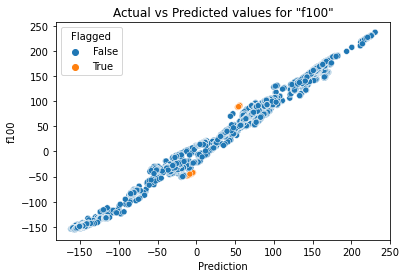

....................................................................................................


### LARGE_GIVEN_PREFIX

### Column(s): "molecule_name" AND "f36"

**Issue ID**: 3

Unusual values were found.<br>

**Description**: "f36" contains very large values given the first word/prefix ['MUSK'] in "molecule_name" (Values<br>that are large given any value of "molecule_name" are not flagged by this test.).

**Number of exceptions**: 6 (0.0909% of rows)

**Examples of values NOT flagged**:

,molecule_name,f36,molecule_name FIRST WORD
564,MUSK-240,141.0,MUSK
923,MUSK-jf47,141.0,MUSK
1756,NON-MUSK-216,99.0,NON
2774,NON-MUSK-252,155.0,NON
2989,NON-MUSK-252,145.0,NON
3477,NON-MUSK-288,74.0,NON
4386,NON-MUSK-f146,171.0,NON
5505,NON-MUSK-j146,86.0,NON
5792,NON-MUSK-j147,98.0,NON
6510,NON-MUSK-j90,177.0,NON


**Flagged values**:

,molecule_name,f36,molecule_name FIRST WORD
50,MUSK-213,286.0,MUSK
51,MUSK-213,286.0,MUSK
61,MUSK-213,286.0,MUSK
105,MUSK-213,286.0,MUSK
126,MUSK-213,286.0,MUSK
127,MUSK-213,286.0,MUSK


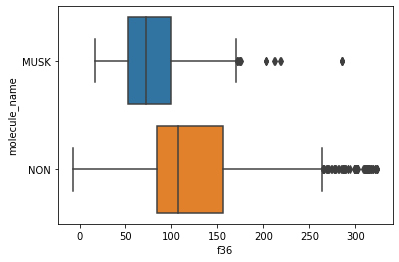

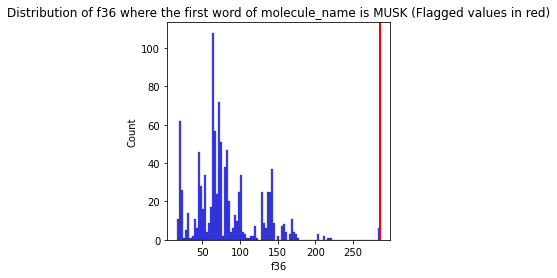

In [27]:
demo_test("musk", test_id_arr=['ALL_POS_OR_ALL_NEG', 'LARGE_GIVEN_PREFIX', 'LINEAR_REGRESSION'], issue_id_arr=[0, 3, 1])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,485.0,477.0,537.0,479.0,452.0,471.0,491.0,476.0,475.0,473.0,...,477.0,481.0,477.0,485.0,511.0,485.0,481.0,479.0,475.0,496.0
1,483.0,458.0,460.0,487.0,587.0,475.0,526.0,479.0,485.0,469.0,...,463.0,478.0,487.0,338.0,513.0,486.0,483.0,492.0,510.0,517.0
2,487.0,542.0,499.0,468.0,448.0,471.0,442.0,478.0,480.0,477.0,...,487.0,481.0,492.0,650.0,506.0,501.0,480.0,489.0,499.0,498.0
3,480.0,491.0,510.0,485.0,495.0,472.0,417.0,474.0,502.0,476.0,...,491.0,480.0,474.0,572.0,454.0,469.0,475.0,482.0,494.0,461.0
4,484.0,502.0,528.0,489.0,466.0,481.0,402.0,478.0,487.0,468.0,...,488.0,479.0,452.0,435.0,486.0,508.0,481.0,504.0,495.0,511.0



Data consistency check complete.
Analysed 2,600 rows, 500 columns
Executed 1 tests.

Patterns without Exceptions:
Found 6 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'LINEAR_REGRESSION'

### Column(s): "V106" AND "V129"

Pattern found (without exceptions)

**Description**:

The column "V129" contains values that are consistently predictable based on a linear regression formula: <br>439.848 +  0.08 * "V106" 

**Examples**:

,V106,V129,PREDICTION
156,752.0,506.0,498.677911
259,617.0,492.0,488.116639
302,658.0,492.0,491.324137
924,722.0,504.0,496.330962
1371,465.0,476.0,476.225430
1426,344.0,468.0,466.759402
2004,395.0,471.0,470.749215
2099,455.0,475.0,475.443114
2403,225.0,456.0,457.449836
2408,516.0,479.0,480.215244


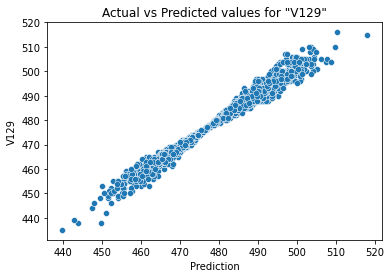

### Column(s): "V282" AND "V434" AND "V154"

Pattern found (without exceptions)

**Description**:

The column "V154" contains values that are consistently predictable based on a linear regression formula: <br>-197.178 +  0.35 * "V282" +  1.08 * "V434" 

**Examples**:

,V282,V434,V154,PREDICTION
156,503.0,525.0,560.0,541.949895
259,535.0,587.0,599.0,620.169218
302,479.0,497.0,507.0,502.293621
924,480.0,499.0,504.0,505.176752
1371,549.0,594.0,607.0,631.699197
1426,532.0,565.0,613.0,592.631472
2004,434.0,448.0,417.0,426.952374
2099,419.0,434.0,413.0,408.156815
2403,434.0,435.0,406.0,412.727665
2408,469.0,483.0,482.0,481.147652


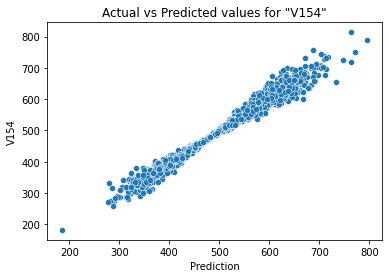

### Column(s): "V154" AND "V282"

Pattern found (without exceptions)

**Description**:

The column "V282" contains values that are consistently predictable based on a linear regression formula: <br>232.400 +  0.49 * "V154" 

**Examples**:

,V154,V282,PREDICTION
156,560.0,503.0,509.274124
259,599.0,535.0,528.528201
302,507.0,479.0,482.527352
924,504.0,480.0,481.639822
1371,607.0,549.0,532.173118
1426,613.0,532.0,534.327322
2004,417.0,434.0,436.951397
2099,413.0,419.0,435.198297
2403,406.0,434.0,431.287935
2408,482.0,469.0,469.786232


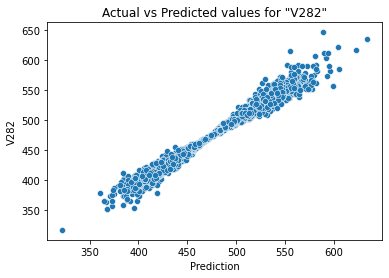

### Column(s): "V65" AND "V337" AND "V443" AND "V339"

Pattern found (without exceptions)

**Description**:

The column "V339" contains values that are consistently predictable based on a linear regression formula: <br>520.554 +  0.15 * "V65" +  0.25 * "V337" +  0.36 * "V443" 

**Examples**:

,V65,V337,V443,V339,PREDICTION
156,381.0,329.0,511.0,368.0,371.947569
259,322.0,297.0,490.0,347.0,347.318895
302,394.0,376.0,397.0,373.0,389.901257
924,357.0,264.0,466.0,364.0,370.388074
1371,382.0,351.0,515.0,385.0,404.286978
1426,603.0,569.0,443.0,490.0,490.316919
2004,499.0,483.0,518.0,609.0,573.633314
2099,454.0,431.0,469.0,539.0,528.760473
2403,531.0,523.0,512.0,613.0,624.903418
2408,539.0,541.0,461.0,510.0,518.185268


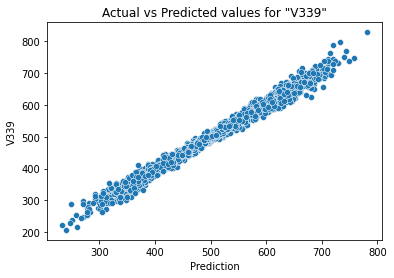

### Column(s): "V339" AND "V473" AND "V494" AND "V443"

Pattern found (without exceptions)

**Description**:

The column "V443" contains values that are consistently predictable based on a linear regression formula: <br>-60.637 +  0.24 * "V339" +  1.35 * "V473" +  0.05 * "V494" 

**Examples**:

,V339,V473,V494,V443,PREDICTION
156,368.0,489.0,621.0,511.0,510.959869
259,347.0,478.0,611.0,490.0,496.624119
302,373.0,434.0,468.0,397.0,397.336107
924,364.0,468.0,580.0,466.0,464.278247
1371,385.0,491.0,580.0,515.0,509.538564
1426,490.0,454.0,511.0,443.0,436.623110
2004,609.0,487.0,343.0,518.0,517.718320
2099,539.0,468.0,341.0,469.0,470.423811
2403,613.0,486.0,294.0,512.0,499.545727
2408,510.0,465.0,469.0,461.0,465.094354


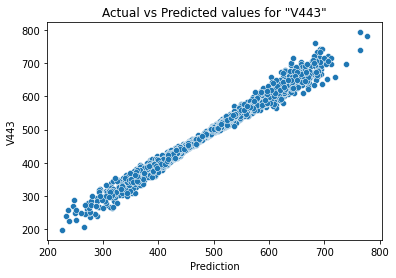

### Column(s): "V443" AND "V473"

Pattern found (without exceptions)

**Description**:

The column "V473" contains values that are consistently predictable based on a linear regression formula: <br>264.015 +  0.44 * "V443" 

**Examples**:

,V443,V473,PREDICTION
156,511.0,489.0,486.944740
259,490.0,478.0,477.783257
302,397.0,434.0,437.210979
924,466.0,468.0,467.312992
1371,515.0,491.0,488.689784
1426,443.0,454.0,457.278988
2004,518.0,487.0,489.998567
2099,469.0,468.0,468.621775
2403,512.0,486.0,487.381001
2408,461.0,465.0,465.131687


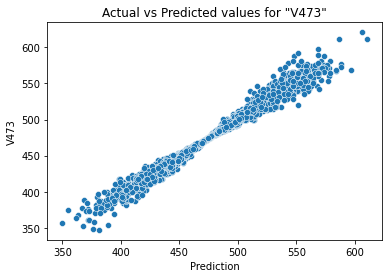

In [28]:
demo_test("madelon", test_id_arr=['LINEAR_REGRESSION'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118
0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,2,2,0.860946,0.82159,...,0.999967,0.750000,0.500000,2,0.999953,0.777778,0.461538,2,1.0,1.000000
1,1.0,0.75,0.857143,0.857143,0.894737,0.947368,2,1,0.860946,0.82159,...,0.999807,0.500000,0.307692,2,0.999983,0.538462,0.437500,2,1.0,1.000000
2,1.0,1.00,1.000000,1.000000,1.000000,1.000000,2,2,0.860946,0.82159,...,0.999983,0.666667,0.461538,2,0.999993,0.800000,0.666667,2,1.0,1.000000
3,1.0,0.75,0.857143,0.857143,0.842105,0.833333,2,1,1.000000,1.00000,...,0.998023,0.500000,0.285714,2,0.998605,0.555556,0.384615,2,1.0,0.999994
4,0.0,0.00,0.250000,0.000000,0.250000,0.000000,1,1,0.860946,0.82159,...,0.978679,0.607880,0.396168,1,0.982576,0.644336,0.438054,1,1.0,0.979322



Data consistency check complete.
Analysed 34,465 rows, 118 columns
Executed 3 tests.

Patterns without Exceptions:
Found 14 patterns without exceptions
3 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 43 patterns with exceptions
3 tests (100.00% of tests) flagged at least one exception each.
Flagged 1,063 row(s) with at least one exception.
Flagged 29 column(s) with at least one exception.
....................................................................................................


### BINARY_MATCHES_VALUES

### Column(s): "V6" AND "V8"

**Issue ID**: 6

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: Column "V8" has 25,735 rows with value "1" and 8,730 rows with value "2" and is consistently "1"<br>when Column "V6" contains values under 0.9375 and "2" when values are over 0.9375, with exceptions.

**Number of exceptions**: 57 (0.1654% of rows)

**Examples of values NOT flagged**:

,V6,V8
3480,0.500000,1
5016,0.592593,1
5943,0.333333,1
7248,0.875000,1
8628,1.000000,2
14450,0.269231,1
28358,0.000000,1
30514,0.024390,1
31616,0.000000,1
34102,0.166667,1


**Examples of flagged values**:

,V6,V8
1,0.947368,1
109,0.947368,1
587,0.947368,1
589,0.947368,1
593,0.947368,1
595,0.947368,1
598,0.947368,1
599,0.947368,1
601,0.947368,1
603,0.947368,1


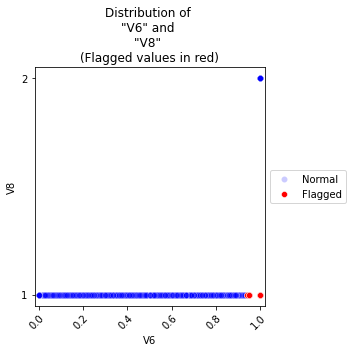

....................................................................................................


### BINARY_MATCHES_SUM

### Column(s): "V1" AND "V109" AND "V7"

**Issue ID**: 10

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: Column "V7" is consistently 1 when the sum of columns "V1" and "V109" is under 1.831509 and 2 when<br>the sum is over, with exceptions.

**Number of exceptions**: 95 (0.2756% of rows)

**Examples of values NOT flagged**:

,V1,V109,V7,SUM
0,1.0,0.999967,2,1.999967
1,1.0,0.999807,2,1.999807
2,1.0,0.999983,2,1.999983
3,1.0,0.998023,2,1.998023
4,0.0,0.978679,1,0.978679
5,1.0,0.999296,2,1.999296
12,0.5,0.999194,1,1.499194
14,0.0,0.997423,1,0.997423
17,0.0,0.999999,1,0.999999
18,0.0,0.999935,1,0.999935


**Examples of flagged values**:

,V1,V109,V7,SUM
474,0.833333,0.999918,1,1.833251
478,0.833333,0.999918,1,1.833251
1210,0.875000,0.999703,1,1.874703
1217,0.875000,0.978679,1,1.853679
2498,0.857143,0.978679,1,1.835822
2502,0.875000,0.997929,1,1.872929
5536,1.000000,0.300583,2,1.300583
5601,1.000000,0.300584,2,1.300584
5662,1.000000,0.298142,2,1.298142
5797,1.000000,0.300579,2,1.300579


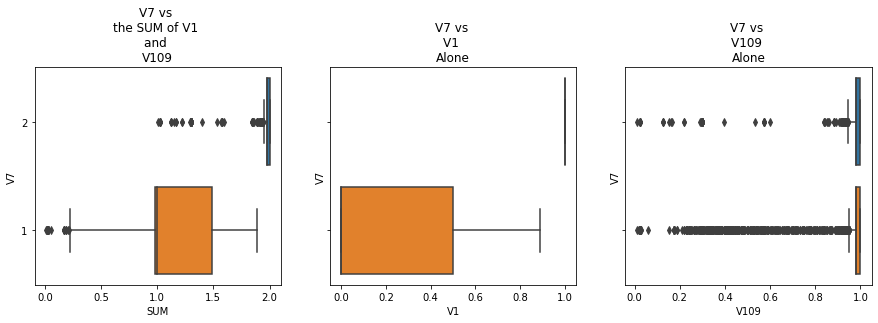

### Column(s): "V2" AND "V109" AND "V8"

**Issue ID**: 20

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: Column "V8" is consistently 1 when the sum of columns "V2" and "V109" is under 1.856603 and 2 when<br>the sum is over, with exceptions.

**Number of exceptions**: 47 (0.1364% of rows)

**Examples of values NOT flagged**:

,V2,V109,V8,SUM
0,1.00,0.999967,2,1.999967
1,0.75,0.999807,1,1.749807
2,1.00,0.999983,2,1.999983
3,0.75,0.998023,1,1.748023
4,0.00,0.978679,1,0.978679
5,0.50,0.999296,1,1.499296
6,0.50,0.999955,1,1.499955
13,1.00,0.996132,2,1.996132
15,1.00,0.978679,2,1.978679
16,1.00,0.985670,2,1.985670


**Examples of flagged values**:

,V2,V109,V8,SUM
5797,1.000000,0.300579,2,1.300579
5821,1.000000,0.300579,2,1.300579
5880,1.000000,0.300527,2,1.300527
8591,0.888889,0.978679,1,1.867568
15172,0.857143,1.000000,1,1.857143
15173,0.857143,1.000000,1,1.857143
15176,0.857143,0.999561,1,1.856704
15203,0.857143,0.999999,1,1.857142
15204,0.857143,1.000000,1,1.857143
15207,0.857143,0.999562,1,1.856705


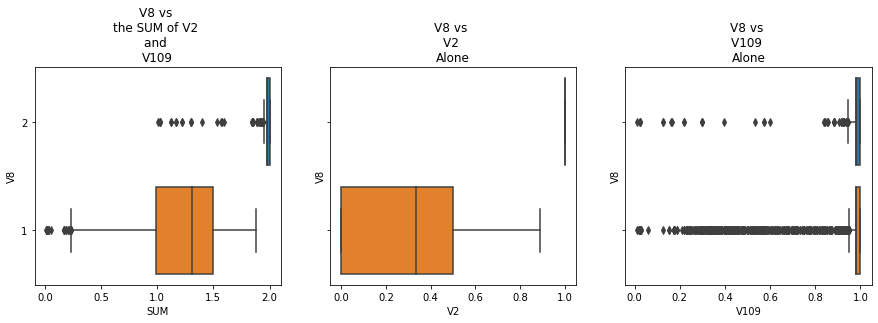

In [29]:
demo_test("nomao", test_id_arr=['BINARY_MATCHES_SUM', 'BINARY_MATCHES_VALUES', 'SIMILAR_WRT_DIFF'], issue_id_arr=[20, 10, 6])

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5.0,7.0,35.0,1.400,0.400,0.657,2.33,14.0,23.0,6.0
1,6.0,7.0,42.0,1.167,0.429,0.881,3.60,18.0,37.0,5.0
2,6.0,18.0,108.0,3.000,0.287,0.741,4.43,31.0,80.0,7.0
3,5.0,7.0,35.0,1.400,0.371,0.743,4.33,13.0,26.0,3.0
4,6.0,3.0,18.0,0.500,0.500,0.944,2.25,9.0,17.0,4.0



Data consistency check complete.
Analysed 5,473 rows, 10 columns
Executed 1 tests.

Patterns without Exceptions:
Found 5 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'SIMILAR_TO_RATIO'

### Column(s): "lenght" AND "height" AND "eccen"

Pattern found (without exceptions)

**Description**:

"eccen" is consistently similar to the ratio of "lenght" and "height"

**Examples**:

,lenght,height,eccen,DIVISION RESULTS
1750,9.0,6.0,1.500,1.500000
2204,16.0,9.0,1.778,1.777778
2915,2.0,7.0,0.286,0.285714
3698,29.0,5.0,5.800,5.800000
4249,91.0,14.0,6.500,6.500000
4298,3.0,3.0,1.000,1.000000
4338,4.0,3.0,1.333,1.333333
4501,215.0,8.0,26.875,26.875000
4823,177.0,5.0,35.400,35.400000
5095,20.0,6.0,3.333,3.333333


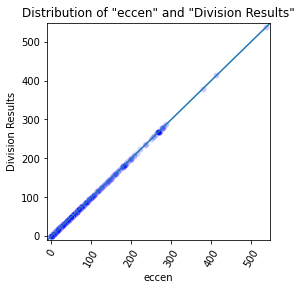

### Column(s): "area" AND "height" AND "lenght"

Pattern found (without exceptions)

**Description**:

"lenght" is consistently similar to the ratio of "area" and "height"

**Examples**:

,area,height,lenght,DIVISION RESULTS
1750,54.0,6.0,9.0,9.0
2204,144.0,9.0,16.0,16.0
2915,14.0,7.0,2.0,2.0
3698,145.0,5.0,29.0,29.0
4249,1274.0,14.0,91.0,91.0
4298,9.0,3.0,3.0,3.0
4338,12.0,3.0,4.0,4.0
4501,1720.0,8.0,215.0,215.0
4823,885.0,5.0,177.0,177.0
5095,120.0,6.0,20.0,20.0


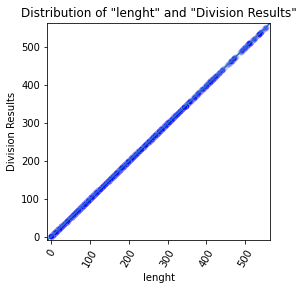

### Column(s): "blackpix" AND "area" AND "p_black"

Pattern found (without exceptions)

**Description**:

"p_black" is consistently similar to the ratio of "blackpix" and "area"

**Examples**:

,blackpix,area,p_black,DIVISION RESULTS
1750,16.0,54.0,0.296,0.296296
2204,30.0,144.0,0.208,0.208333
2915,10.0,14.0,0.714,0.714286
3698,58.0,145.0,0.400,0.400000
4249,495.0,1274.0,0.389,0.388540
4298,7.0,9.0,0.778,0.777778
4338,8.0,12.0,0.667,0.666667
4501,629.0,1720.0,0.366,0.365698
4823,200.0,885.0,0.226,0.225989
5095,38.0,120.0,0.317,0.316667


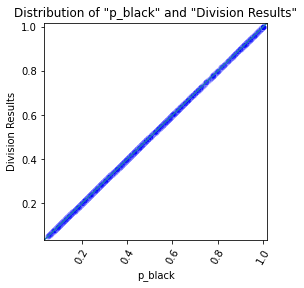

### Column(s): "blackpix" AND "mean_tr" AND "wb_trans"

Pattern found (without exceptions)

**Description**:

"wb_trans" is consistently similar to the ratio of "blackpix" and "mean_tr"

**Examples**:

,blackpix,mean_tr,wb_trans,DIVISION RESULTS
1750,16.0,1.23,13.0,13.008130
2204,30.0,1.50,20.0,20.000000
2915,10.0,10.00,1.0,1.000000
3698,58.0,1.61,36.0,36.024845
4249,495.0,5.05,98.0,98.019802
4298,7.0,7.00,1.0,1.000000
4338,8.0,8.00,1.0,1.000000
4501,629.0,2.86,220.0,219.930070
4823,200.0,1.71,117.0,116.959064
5095,38.0,1.52,25.0,25.000000


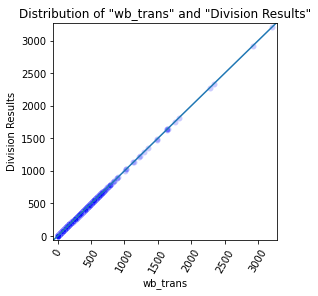

### Column(s): "blackand" AND "area" AND "p_and"

Pattern found (without exceptions)

**Description**:

"p_and" is consistently similar to the ratio of "blackand" and "area"

**Examples**:

,blackand,area,p_and,DIVISION RESULTS
1750,43.0,54.0,0.796,0.796296
2204,103.0,144.0,0.715,0.715278
2915,10.0,14.0,0.714,0.714286
3698,140.0,145.0,0.966,0.965517
4249,800.0,1274.0,0.628,0.627943
4298,7.0,9.0,0.778,0.777778
4338,8.0,12.0,0.667,0.666667
4501,1362.0,1720.0,0.792,0.791860
4823,441.0,885.0,0.498,0.498305
5095,118.0,120.0,0.983,0.983333


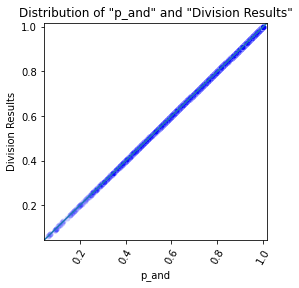

In [30]:
demo_test("page-blocks", test_id_arr=['SIMILAR_TO_RATIO'])

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,3212.96,80.0,44.0,11.0,31.0,29.0,66.0,192.0,126.0,17.0
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,4015.70,97.0,41.0,12.0,24.0,28.0,75.0,229.0,152.0,38.0
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,87305.94,457.0,71.0,48.0,49.0,64.0,397.0,1397.0,942.0,178.0



Data consistency check complete.
Analysed 1,109 rows, 21 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 2 row(s) with at least one exception.
Flagged 3 column(s) with at least one exception.



Displaying results for tests: 'SUM_OF_COLUMNS'

### Column(s): "total_Op" AND "total_Opnd" AND "N"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column "N" is consistently equal to the sum of the values in the columns ['total_Op',<br>'total_Opnd'], with exceptions.

**Number of exceptions**: 2 (0.1803% of rows)

**Examples of values NOT flagged**:

,total_Op,total_Opnd,N,SUM
305,8.0,4.0,12.0,12.0
469,82.0,64.0,146.0,146.0
486,28.0,27.0,55.0,55.0
771,7.0,5.0,12.0,12.0
807,8.0,7.0,15.0,15.0
828,22.0,13.0,35.0,35.0
896,28.0,24.0,52.0,52.0
925,10.0,6.0,16.0,16.0
951,20.0,20.0,40.0,40.0
1092,126.0,102.0,228.0,228.0


**Flagged values**:

,total_Op,total_Opnd,N,SUM
0,1.2,1.2,1.3,2.4
1,1.0,1.0,1.0,2.0


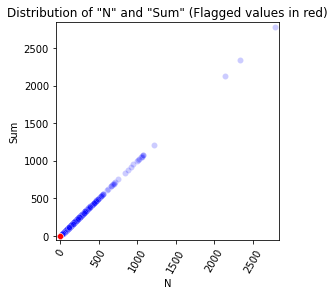

In [31]:
demo_test("pc1", test_id_arr=['SUM_OF_COLUMNS'])

,Favorite_Points,Underdog_Points,Pointspread,Favorite_Name,Underdog_name,Year,Week,Weekday,Overtime
0,27.0,24.0,4.0,BUF,MIA,89.0,1.0,NaN,NaN
1,17.0,14.0,3.0,CHI,CIN,89.0,1.0,NaN,NaN
2,51.0,0.0,2.5,CLE,PIT,89.0,1.0,NaN,NaN
3,28.0,0.0,5.5,NO,DAL,89.0,1.0,NaN,NaN
4,38.0,7.0,5.5,MIN,HOU,89.0,1.0,NaN,NaN



Data consistency check complete.
Analysed 672 rows, 9 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 2 row(s) with at least one exception.
Flagged 1 column(s) with at least one exception.



Displaying results for tests: 'COLUMN_ORDERED_ASC'

### Column(s): Week

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column contains consistently ascending values, with exceptions.

**Number of exceptions**: 2 (0.2976% of rows)

**Examples of values NOT flagged (showing a consecutive set of rows)**:

,Week
227,1.0
228,1.0
229,1.0
230,1.0
231,1.0
232,1.0
233,1.0
234,1.0
235,1.0
236,1.0


**Flagged values**:

,Week
224,1.0
448,1.0


Showing the first flagged example with the 5 rows before and 5 rows after (if available):

,Week
219,16.0
220,16.0
221,16.0
222,16.0
223,16.0
224,1.0
225,1.0
226,1.0
227,1.0
228,1.0


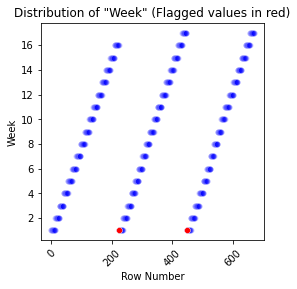

In [32]:
demo_test("profb", test_id_arr=['COLUMN_ORDERED_ASC'])

In [33]:
demo_test("speeddating", test_id_arr=['CHARS_PATTERN'], features_arr=['d_d_age'])

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met
0,0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
1,0,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0
2,1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0
3,0,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
4,0,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,2.0,4.0,[0-4],[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0



Data consistency check complete.
Analysed 8,378 rows, 120 columns
Executed 1 tests.

Patterns without Exceptions:
Found 54 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for columns: ['d_d_age']

### Column(s): d_d_age

Pattern found (without exceptions)

**Description**:

Column "d_d_age" consistently contains values with the pattern "[X-X]", where "X" represents alpha-numeric characters

**Examples**:

,d_d_age
196,[2-3]
2265,[2-3]
2851,[4-6]
3407,[4-6]
3655,[0-1]
3699,[0-1]
3719,[4-6]
4750,[4-6]
4916,[7-37]
6191,[4-6]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.6435,0.8182,-0.2913,0.5822,1.0,0.0,0.0,0.0,0.0,0.0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,1.4624,0.7931,-0.1756,0.2984,1.0,0.0,0.0,0.0,0.0,0.0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,1.2553,0.6667,-0.1228,0.2150,1.0,0.0,0.0,0.0,0.0,0.0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.6532,0.8444,-0.1568,0.5212,1.0,0.0,0.0,0.0,0.0,0.0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,2.4099,0.9338,-0.1992,1.0000,1.0,0.0,0.0,0.0,0.0,0.0



Data consistency check complete.
Analysed 1,941 rows, 33 columns
Executed 1 tests.

Patterns without Exceptions:
Found 1 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'CONSTANT_RATIO'

### Column(s): "V3" AND "V4"

Pattern found (without exceptions)

**Description**:

The ratio of "V3" and "V4" is consistently close to 0.9999758472643326

**Examples**:

,V3,V4,DIVISION RESULTS
148,12917033.0,12917094.0,0.999995
215,923170.0,923211.0,0.999956
436,1206989.0,1207040.0,0.999958
704,4401486.0,4401544.0,0.999987
726,115072.0,115195.0,0.998932
768,273908.0,273912.0,0.999985
813,68445.0,68506.0,0.999110
1158,961065.0,961092.0,0.999972
1423,1038876.0,1038891.0,0.999986
1611,2887288.0,2887307.0,0.999993


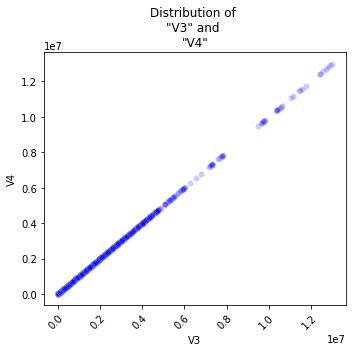

In [34]:
demo_test("steel-plates-fault", test_id_arr=['CONSTANT_RATIO'])

In [35]:
demo_test("segment", test_id_arr=['ALL_POS_OR_ALL_NEG', 'NUMBER_DECIMALS'], issue_id_arr=[0, 1])

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,218.0,178.0,9.0,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055
1,113.0,130.0,9.0,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325
2,202.0,41.0,9.0,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992
3,32.0,173.0,9.0,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886
4,61.0,197.0,9.0,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227



Data consistency check complete.
Analysed 2,310 rows, 18 columns
Executed 2 tests.

Patterns without Exceptions:
Found 2 patterns without exceptions
1 tests (50.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 2 patterns with exceptions
2 tests (100.00% of tests) flagged at least one exception each.
Flagged 5 row(s) with at least one exception.
Flagged 2 column(s) with at least one exception.
....................................................................................................


### NUMBER_DECIMALS

### Column(s): hue-mean

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The column contains values consistently with 0, 1, 2, 3, 4, 5 decimals, with exceptions.

**Number of exceptions**: 1 (0.0433% of rows)

**Examples of values NOT flagged**:

,hue-mean,Number decimals
124,-0.874641,6
486,-1.19107,5
933,-2.05798,5
1082,-2.18542,5
1332,-2.40894,5
1360,-1.70283,5
1519,-2.02178,5
1586,-2.13034,5
2217,-2.06017,5
2296,-2.33587,5


**Flagged values**:

,hue-mean,Number decimals
1807,-0.00492694,8


....................................................................................................


### ALL_POS_OR_ALL_NEG

### Column(s): "exgreen-mean" AND "hue-mean"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The columns in 'exgreen-mean', 'hue-mean' are consistently positive and negative together, with<br>exceptions.

**Number of exceptions**: 4 (0.1732% of rows)

**Examples of values NOT flagged**:

,exgreen-mean,hue-mean
0,-25.22220,-2.04055
1,-2.33333,-2.12325
2,-16.77780,-2.29992
3,-15.77780,-1.99886
4,-19.77780,-2.02227
6,10.44440,2.65160
14,5.66667,1.98437
24,9.33333,2.09723
30,16.11110,2.23285
34,14.11110,2.26720


**Flagged values**:

,exgreen-mean,hue-mean
1138,2.333330,-2.86995
1350,3.000000,-3.04418
1351,0.111111,-2.61865
1693,0.333333,-2.63939


,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr290,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.124074,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.176387,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.006049,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.009735,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.218534,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0



Data consistency check complete.
Analysed 2,407 rows, 299 columns
Executed 1 tests.

Patterns without Exceptions:
Found 5 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 1 row(s) with at least one exception.
Flagged 2 column(s) with at least one exception.



### Column(s): "Beach" AND "Field"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: "Beach" value: "1" consistently implies "Field" value: 0, with exceptions.

**Number of exceptions**: 1 (0.0415% of rows)

**Examples of values NOT flagged**:

,Beach,Field
0,1,0
1,1,0
227,0,0
228,0,0
393,0,1
395,0,1


**Flagged values**:

,Beach,Field
1376,1,1


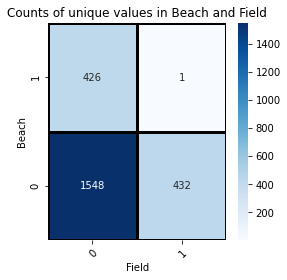

In [36]:
demo_test("scene", test_id_arr=['BINARY_IMPLIES'], issue_id_arr=[0])

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0



Data consistency check complete.
Analysed 4,601 rows, 57 columns
Executed 1 tests.

Patterns without Exceptions:
Found 0 patterns without exceptions
0 tests (0.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 1 patterns with exceptions
1 tests (100.00% of tests) flagged at least one exception each.
Flagged 19 row(s) with at least one exception.
Flagged 2 column(s) with at least one exception.



Displaying results for tests: 'SAME_VALUES'

### Column(s): "word_freq_857" AND "word_freq_415"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.<br>

**Description**: The values in "word_freq_415" are consistently the same as those in "word_freq_857", with<br>exceptions.

**Number of exceptions**: 19 (0.4130% of rows)

**Examples of values NOT flagged**:

,word_freq_857,word_freq_415
503,0.0,0.0
640,0.0,0.0
1502,0.0,0.0
1591,0.0,0.0
1678,0.0,0.0
2125,0.0,0.0
2486,0.0,0.0
2513,0.0,0.0
3001,0.0,0.0
3782,0.0,0.0


**Examples of flagged values**:

,word_freq_857,word_freq_415
68,0.00,0.30
326,0.00,0.17
345,0.00,0.38
558,0.00,0.12
675,0.00,0.07
679,0.00,0.07
785,0.47,0.00
1136,0.00,0.19
1185,0.00,1.35
1312,0.47,0.00


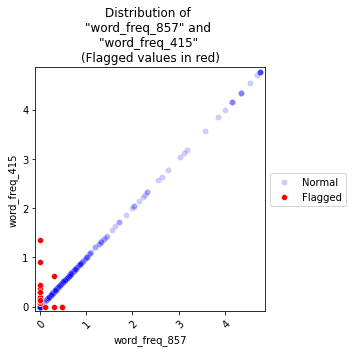

In [37]:
demo_test("Spambase", test_id_arr=['SAME_VALUES'])

In [38]:
demo_test("Soybean", test_id_arr=['MATCHED_MISSING', 'DECISION_TREE_CLASSIFIER'])

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm



Data consistency check complete.
Analysed 683 rows, 35 columns
Executed 2 tests.

Patterns without Exceptions:
Found 7 patterns without exceptions
2 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'MATCHED_MISSING', 'DECISION_TREE_CLASSIFIER'

....................................................................................................


### MATCHED_MISSING

### Column(s): "precip" AND "stem-cankers" AND "canker-lesion" AND "external-decay" AND "mycelium" AND "int-discolor" AND "sclerotia"

Pattern found (without exceptions)

**Description**:

The columns consistently have missing values in the same rows, with 38 missing values.

**Examples**:

,precip,stem-cankers,canker-lesion,external-decay,mycelium,int-discolor,sclerotia
0,gt-norm,above-sec-nde,brown,firm-and-dry,absent,none,absent
1,gt-norm,above-sec-nde,brown,firm-and-dry,absent,none,absent
2,gt-norm,above-sec-nde,dna,firm-and-dry,absent,none,absent
3,gt-norm,above-sec-nde,dna,firm-and-dry,absent,none,absent
4,gt-norm,above-sec-nde,brown,firm-and-dry,absent,none,absent
296,nan,nan,nan,nan,nan,nan,nan
297,nan,nan,nan,nan,nan,nan,nan
298,nan,nan,nan,nan,nan,nan,nan
299,nan,nan,nan,nan,nan,nan,nan
300,nan,nan,nan,nan,nan,nan,nan


### Column(s): "hail" AND "severity" AND "seed-tmt" AND "lodging"

Pattern found (without exceptions)

**Description**:

The columns consistently have missing values in the same rows, with 121 missing values.

**Examples**:

,hail,severity,seed-tmt,lodging
0,yes,pot-severe,none,no
1,yes,severe,fungicide,yes
2,yes,severe,fungicide,yes
3,yes,severe,none,yes
4,yes,pot-severe,none,yes
31,nan,nan,nan,nan
32,nan,nan,nan,nan
34,nan,nan,nan,nan
35,nan,nan,nan,nan
38,nan,nan,nan,nan


### Column(s): "crop-hist" AND "plant-growth" AND "stem"

Pattern found (without exceptions)

**Description**:

The columns consistently have missing values in the same rows, with 16 missing values.

**Examples**:

,crop-hist,plant-growth,stem
0,same-lst-yr,abnorm,abnorm
1,same-lst-two-yrs,abnorm,abnorm
2,same-lst-yr,abnorm,abnorm
3,same-lst-yr,abnorm,abnorm
4,same-lst-two-yrs,abnorm,abnorm
302,nan,nan,nan
664,nan,nan,nan
665,nan,nan,nan
666,nan,nan,nan
667,nan,nan,nan


### Column(s): "leafspots-halo" AND "leafspots-marg" AND "leafspot-size" AND "leaf-malf"

Pattern found (without exceptions)

**Description**:

The columns consistently have missing values in the same rows, with 84 missing values.

**Examples**:

,leafspots-halo,leafspots-marg,leafspot-size,leaf-malf
0,absent,dna,dna,absent
1,absent,dna,dna,absent
2,absent,dna,dna,absent
3,absent,dna,dna,absent
4,absent,dna,dna,absent
32,nan,nan,nan,nan
34,nan,nan,nan,nan
35,nan,nan,nan,nan
41,nan,nan,nan,nan
45,nan,nan,nan,nan


### Column(s): "fruiting-bodies" AND "fruit-spots" AND "seed-discolor" AND "shriveling"

Pattern found (without exceptions)

**Description**:

The columns consistently have missing values in the same rows, with 106 missing values.

**Examples**:

,fruiting-bodies,fruit-spots,seed-discolor,shriveling
0,present,dna,absent,absent
1,present,dna,absent,absent
2,present,dna,absent,absent
3,present,dna,absent,absent
4,present,dna,absent,absent
31,nan,nan,nan,nan
32,nan,nan,nan,nan
34,nan,nan,nan,nan
35,nan,nan,nan,nan
38,nan,nan,nan,nan


### Column(s): "seed" AND "mold-growth" AND "seed-size"

Pattern found (without exceptions)

**Description**:

The columns consistently have missing values in the same rows, with 92 missing values.

**Examples**:

,seed,mold-growth,seed-size
0,norm,absent,norm
1,norm,absent,norm
2,norm,absent,norm
3,norm,absent,norm
4,norm,absent,norm
31,nan,nan,nan
32,nan,nan,nan
34,nan,nan,nan
35,nan,nan,nan
38,nan,nan,nan


....................................................................................................


### DECISION_TREE_CLASSIFIER

### Column(s): "int-discolor" AND "mycelium" AND "sclerotia"

Pattern found (without exceptions)

**Description**:

The values in column "sclerotia" are consistently predictable from ['int-discolor', 'mycelium'] based using a decision tree with the following rules: <br>|--- mycelium is not nan<br>|   |--- int-discolor is not black<br>|   |   |--- class: absent<br>|   |--- int-discolor is black<br>|   |   |--- class: present<br>|--- mycelium is nan<br>|   |--- class: nan<br>

**Examples**:

,int-discolor,mycelium,sclerotia,PREDICTION
0,none,absent,absent,absent
1,none,absent,absent,absent
2,none,absent,absent,absent
10,black,absent,present,present
11,black,absent,present,present
12,black,absent,present,present
296,nan,nan,nan,nan
297,nan,nan,nan,nan
298,nan,nan,nan,nan


,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0



Data consistency check complete.
Analysed 846 rows, 18 columns
Executed 2 tests.

Patterns without Exceptions:
Found 3 patterns without exceptions
2 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'LINEAR_REGRESSION', 'SIMILAR_WRT_DIFF'

....................................................................................................


### LINEAR_REGRESSION

### Column(s): "SCALED_VARIANCE_MINOR" AND "SCATTER_RATIO"

Pattern found (without exceptions)

**Description**:

The column "SCATTER_RATIO" contains values that are consistently predictable based on a linear regression formula: <br>87.605 +  0.19 * "SCALED_VARIANCE_MINOR" 

**Examples**:

,SCALED_VARIANCE_MINOR,SCATTER_RATIO,PREDICTION
31,293.0,140.0,141.854660
145,728.0,222.0,222.396617
222,531.0,186.0,185.921294
416,299.0,141.0,142.965584
506,667.0,214.0,211.102227
577,600.0,200.0,198.696914
612,191.0,114.0,122.968960
661,561.0,193.0,191.475911
730,730.0,225.0,222.766924
794,327.0,148.0,148.149894


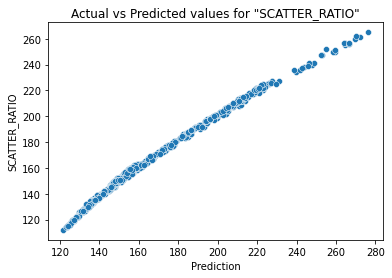

### Column(s): "SCATTER_RATIO" AND "SCALED_VARIANCE_MINOR"

Pattern found (without exceptions)

**Description**:

The column "SCALED_VARIANCE_MINOR" contains values that are consistently predictable based on a linear regression formula: <br>-432.777 +  5.16 * "SCATTER_RATIO" 

**Examples**:

,SCATTER_RATIO,SCALED_VARIANCE_MINOR,PREDICTION
31,140.0,293.0,289.897958
145,222.0,728.0,713.178808
222,186.0,531.0,527.348191
416,141.0,299.0,295.059919
506,214.0,667.0,671.883115
577,200.0,600.0,599.615653
612,114.0,191.0,155.686956
661,193.0,561.0,563.481922
730,225.0,730.0,728.664693
794,148.0,327.0,331.193650


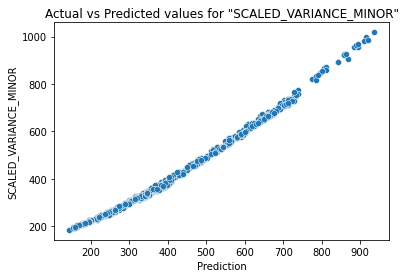

....................................................................................................


### SIMILAR_WRT_DIFF

### Column(s): "KURTOSIS_ABOUT_MINOR" AND "HOLLOWS_RATIO"

Pattern found (without exceptions)

**Description**:

"KURTOSIS_ABOUT_MINOR" and "HOLLOWS_RATIO" have consistently similar values in terms of their absolute difference

**Examples**:

,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
31,198.0,205.0
145,189.0,200.0
222,197.0,198.0
416,193.0,199.0
506,190.0,206.0
577,189.0,198.0
612,179.0,183.0
661,194.0,203.0
730,187.0,201.0
794,188.0,195.0


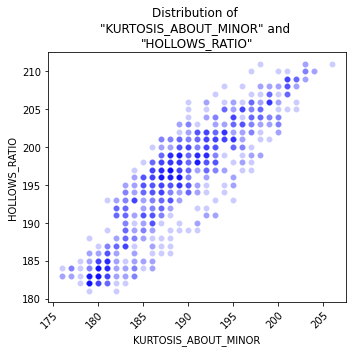

In [39]:
demo_test("Vehicle", test_id_arr=['LINEAR_REGRESSION', 'SIMILAR_WRT_DIFF'])

In [40]:
demo_test("vowel", test_id_arr=['GROUPED_STRINGS'])

,Train_or_Test,Speaker_Number,Sex,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
0,Train,Andrew,Male,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,Train,Andrew,Male,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,Train,Andrew,Male,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,Train,Andrew,Male,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,Train,Andrew,Male,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396



Data consistency check complete.
Analysed 990 rows, 13 columns
Executed 1 tests.

Patterns without Exceptions:
Found 2 patterns without exceptions
1 tests (100.00% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 0 patterns with exceptions
0 tests (0.00% of tests) flagged at least one exception each.
Flagged 0 row(s) with at least one exception.
Flagged 0 column(s) with at least one exception.



Displaying results for tests: 'GROUPED_STRINGS'

### Column(s): Speaker_Number

Pattern found (without exceptions)

**Description**:

The values in "Speaker_Number" are consistently grouped together. The overall order is: <br>Value: "Andrew": rows 0 to 65<br>Value: "Bill": rows 66 to 131<br>Value: "David": rows 132 to 197<br>Value: "Mark": rows 198 to 263<br>Value: "Jo": rows 264 to 329<br>Value: "Kate": rows 330 to 395<br>Value: "Penny": rows 396 to 461<br>Value: "Rose": rows 462 to 527<br>Value: "Mike": rows 528 to 593<br>Value: "Nick": rows 594 to 659<br>Value: "Rich": rows 660 to 725<br>Value: "Tim": rows 726 to 791<br>Value: "Sarah": rows 792 to 857<br>Value: "Sue": rows 858 to 923<br>Value: "Wendy": rows 924 to 989

Examples are not shown for this pattern.

### Column(s): Train_or_Test

Pattern found (without exceptions)

**Description**:

The values in "Train_or_Test" are consistently grouped together. The overall order is: <br>Value: "Train": rows 0 to 527<br>Value: "Test": rows 528 to 989

Examples are not shown for this pattern.